<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/C%C3%B3pia_de_Fotometria_Estrelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Fotometria de Estrelas
### Este notebook lê um arquivo CSV contendo dados de fotometria de estrelas e visualiza as 10 primeiras fotometrias como gráficos de linhas.

### 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

### 2. Leitura do Arquivo CSV

In [2]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
print(f"O número total de estrelas é: {numero_estrelas}")

O número total de estrelas é: 17378


### 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos.

In [3]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


### 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [4]:
#A coluna `MAG_APER_COR_3_0` contém múltiplos valores separados por espaços. Vamos dividi-la em 57 colunas separadas.
#Criamos uma lista de nomes para as novas colunas.

colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [5]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [6]:
#Dividimos a coluna `MAG_APER_COR_3_0` em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)

In [7]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)

In [8]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


### 5. Visualização das 10 Primeiras Fotometrias

O objetivo deste item é visualizar as magnitudes fotométricas das 10 primeiras estrelas em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

In [9]:
#Vamos plotar as 10 primeiras fotometrias como gráficos de linhas.
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

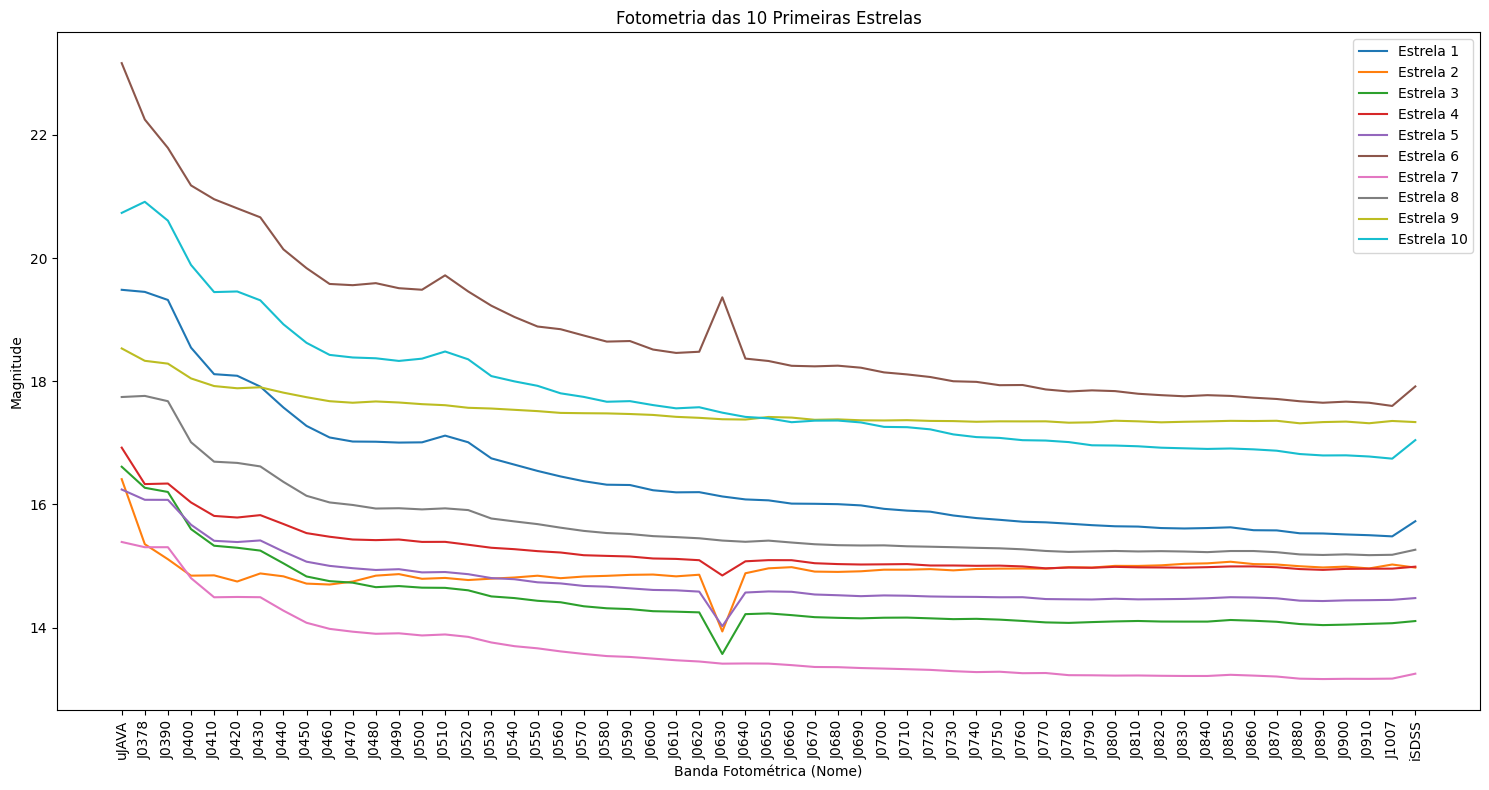

In [10]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

#Loop para plotar as 10 primeiras estrelas.

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, df.loc[i, columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria das 10 Primeiras Estrelas')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### 6. Visualização de 10 Fotometrias de estrelas aleatórias

O objetivo deste item é visualizar as magnitudes fotométricas de 10 estrelas aleatórias em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

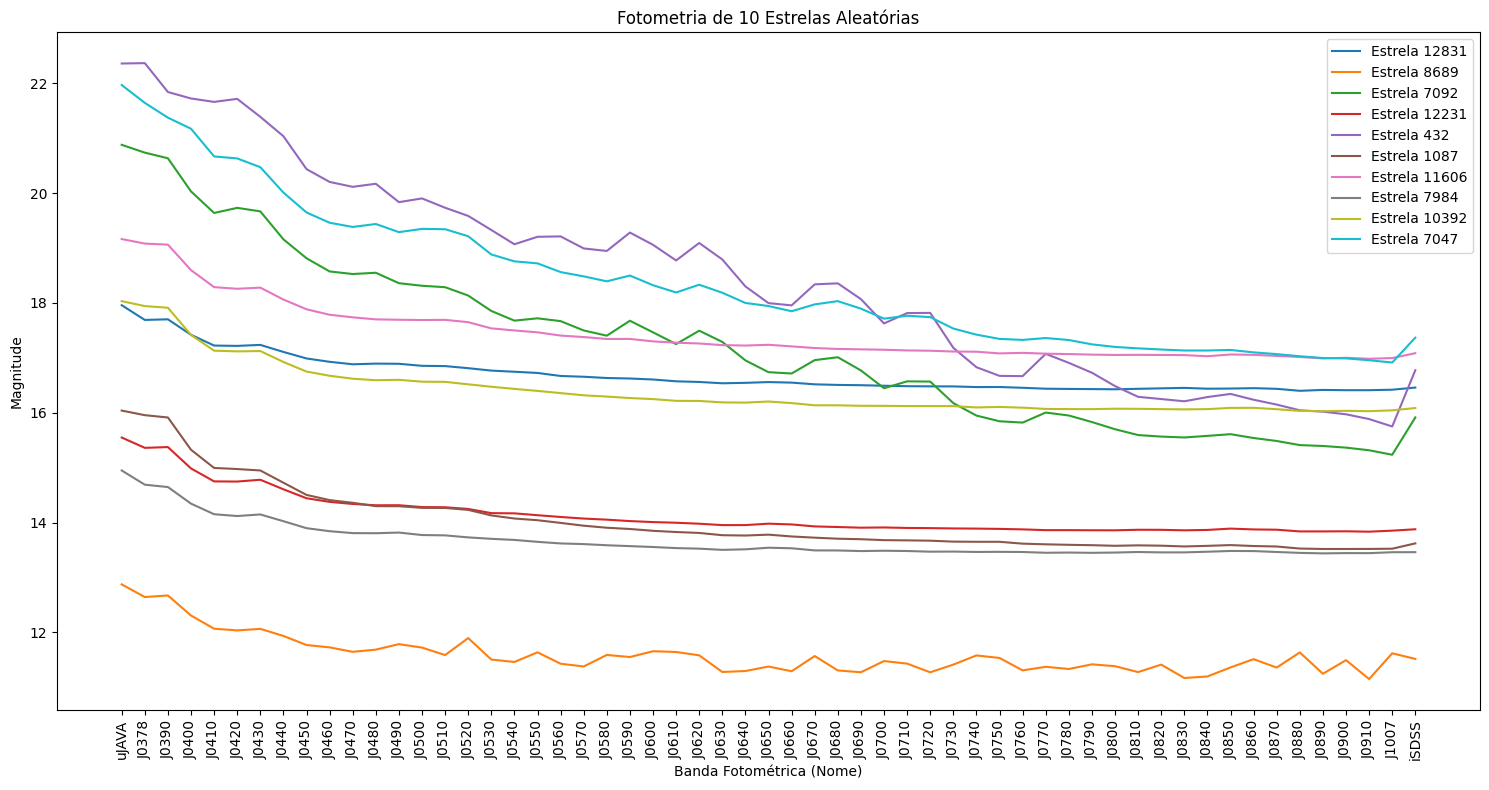

In [11]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Selecionar 10 estrelas aleatórias
random_stars = df.sample(n=10, random_state=42)  # random_state para reprodutibilidade

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 estrelas aleatórias
for i, row in random_stars.iterrows():
    plt.plot(filter_names, row[columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria de 10 Estrelas Aleatórias')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Análise dos Resultados

1. **Estrutura do Gráfico**:
   - O eixo X representa as **57 bandas fotométricas**, numeradas de 1 a 57.
   - O eixo Y representa as **magnitudes** das estrelas em cada banda fotométrica.
   - Cada linha no gráfico corresponde a uma das 10 primeiras estrelas do DataFrame.

2. **Legibilidade do Eixo X**:
   - Os rótulos do eixo X foram simplificados para mostrar apenas os números de 1 a 57, em vez dos nomes completos das colunas (como "Fotometria_1", "Fotometria_2", etc.).
   - Os rótulos foram rotacionados em 90 graus (`rotation=90`) para evitar sobreposição, garantindo que todos os números sejam visíveis.

3. **Comportamento das Curvas**:
   - Cada curva no gráfico mostra como a magnitude de uma estrela varia ao longo das 57 bandas fotométricas.
   - Estrelas com magnitudes mais baixas (valores menores no eixo Y) são mais brilhantes, enquanto magnitudes mais altas indicam estrelas mais fracas.
   - Se houver padrões semelhantes entre as curvas, isso pode indicar que as estrelas têm propriedades fotométricas semelhantes (por exemplo, pertencerem à mesma classe espectral ou estágio evolutivo).

4. **Legenda**:
   - A legenda identifica cada estrela pelo número correspondente (de 1 a 10).
   - Isso permite comparar facilmente o comportamento fotométrico de cada estrela.

5. **Melhorias na Visualização**:
   - O uso de `plt.tight_layout()` garante que o gráfico seja renderizado sem sobreposição de elementos.
   - O tamanho da figura (`figsize=(15, 8)`) foi aumentado para acomodar melhor os 57 rótulos no eixo X.


#### **Interpretação dos Dados**

- **Variação nas Magnitudes**:
  - Se as curvas das estrelas forem semelhantes, isso sugere que as estrelas têm propriedades fotométricas parecidas.
  - Se houver grandes diferenças entre as curvas, isso pode indicar que as estrelas têm características distintas (como temperaturas diferentes, estágios evolutivos diferentes ou presença de poeira interestelar).

- **Picos ou Vales**:
  - Picos (aumentos repentinos na magnitude) ou vales (quedas repentinas) podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão.

- **Comparação entre Estrelas**:
  - Estrelas com magnitudes consistentemente mais baixas (mais brilhantes) em todas as bandas podem ser estrelas mais próximas ou intrinsecamente mais luminosas.
  - Estrelas com magnitudes mais altas (mais fracas) podem ser estrelas mais distantes ou menos luminosas.

#### **Conclusão**

O gráfico fornece uma visão clara do comportamento fotométrico das 10 primeiras estrelas ao longo das 57 bandas fotométricas. A partir da análise, podemos inferir:

1. **Propriedades Físicas**:
   - As diferenças nas magnitudes ao longo das bandas fotométricas podem ser usadas para inferir propriedades como temperatura, luminosidade e composição química das estrelas.

2. **Classificação Estelar**:
   - Estrelas com curvas semelhantes podem pertencer à mesma classe espectral ou estágio evolutivo.

3. **Anomalias**:
   - Picos ou vales nas curvas podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão, que podem ser investigadas em análises mais detalhadas.

### 7. Normalização dos dados

#### 7.1. Identificar as Bandas Jxxx e iSDSS

In [12]:
# Encontrar índices das bandas J (ex: J0378, J0395, etc.) e iSDSS
bandas_j = [i for i, nome in enumerate(filter_names) if nome.startswith('J')]
banda_i = [i for i, nome in enumerate(filter_names) if 'iSDSS' in nome][0]  # Assume que existe exatamente uma banda iSDSS

print("Bandas J disponíveis:", [filter_names[i] for i in bandas_j])
print("Banda iSDSS usada para normalização:", filter_names[banda_i])

Bandas J disponíveis: ['J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540', 'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630', 'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720', 'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810', 'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900', 'J0910', 'J1007']
Banda iSDSS usada para normalização: iSDSS


#### 7.2 . Calcular Cores Jxxx - iSDSS para Todas as Bandas

Subtrair o valor de iSDSS de todas as bandas de cada estrela:

In [13]:
# Criar DataFrame para cores normalizadas (Jxxx - iSDSS)
cores_normalizadas = pd.DataFrame()

for i in range(57):  # 57 bandas fotométricas
    nome_banda = filter_names[i]
    cores_normalizadas[nome_banda] = df[f'Fotometria_{i+1}'] - df[f'Fotometria_{banda_i+1}']  # Subtrai iSDSS

# Visualizar as primeiras linhas
print("\nDataFrame de cores normalizadas (Jxxx - iSDSS):")
print(cores_normalizadas.head())


DataFrame de cores normalizadas (Jxxx - iSDSS):
   uJAVA  J0378  J0390  J0400  J0410  J0420  J0430  J0440  J0450  J0460  ...  \
0  3.758  3.724  3.593  2.819  2.388  2.362  2.186  1.847  1.548  1.360  ...   
1  1.436  0.380  0.136 -0.131 -0.126 -0.226 -0.095 -0.142 -0.260 -0.275  ...   
2  2.506  2.164  2.096  1.493  1.223  1.190  1.144  0.937  0.724  0.648  ...   
3  1.933  1.341  1.350  1.043  0.824  0.798  0.837  0.693  0.545  0.486  ...   
4  1.763  1.596  1.595  1.191  0.930  0.910  0.936  0.756  0.591  0.523  ...   

   J0840  J0850  J0860  J0870  J0880  J0890  J0900  J0910  J1007  iSDSS  
0 -0.111 -0.099 -0.146 -0.149 -0.196 -0.199 -0.215 -0.227 -0.246    0.0  
1  0.069  0.095  0.057  0.050  0.022  0.002  0.016 -0.014  0.050    0.0  
2 -0.009  0.017  0.005 -0.012 -0.049 -0.066 -0.058 -0.046 -0.035    0.0  
3 -0.008  0.004  0.004 -0.009 -0.039 -0.052 -0.036 -0.033 -0.032    0.0  
4 -0.003  0.014  0.009 -0.004 -0.042 -0.048 -0.037 -0.034 -0.029    0.0  

[5 rows x 57 columns]


#### 7.3. Calcular Cores Normalizadas (Jxxx - iSDSS)

In [14]:
# Encontrar o índice da banda iSDSS
banda_i = [i for i, nome in enumerate(filter_names) if 'iSDSS' in nome][0]  # Assume que existe exatamente uma banda iSDSS

# Calcular cores normalizadas (Jxxx - iSDSS) para todas as bandas
cores_normalizadas = pd.DataFrame()
for i in range(57):
    nome_banda = filter_names[i]
    cores_normalizadas[nome_banda] = df[f'Fotometria_{i+1}'] - df[f'Fotometria_{banda_i+1}']

#### 7.4. Plotar as 10 Primeiras Estrelas (Normalizadas)

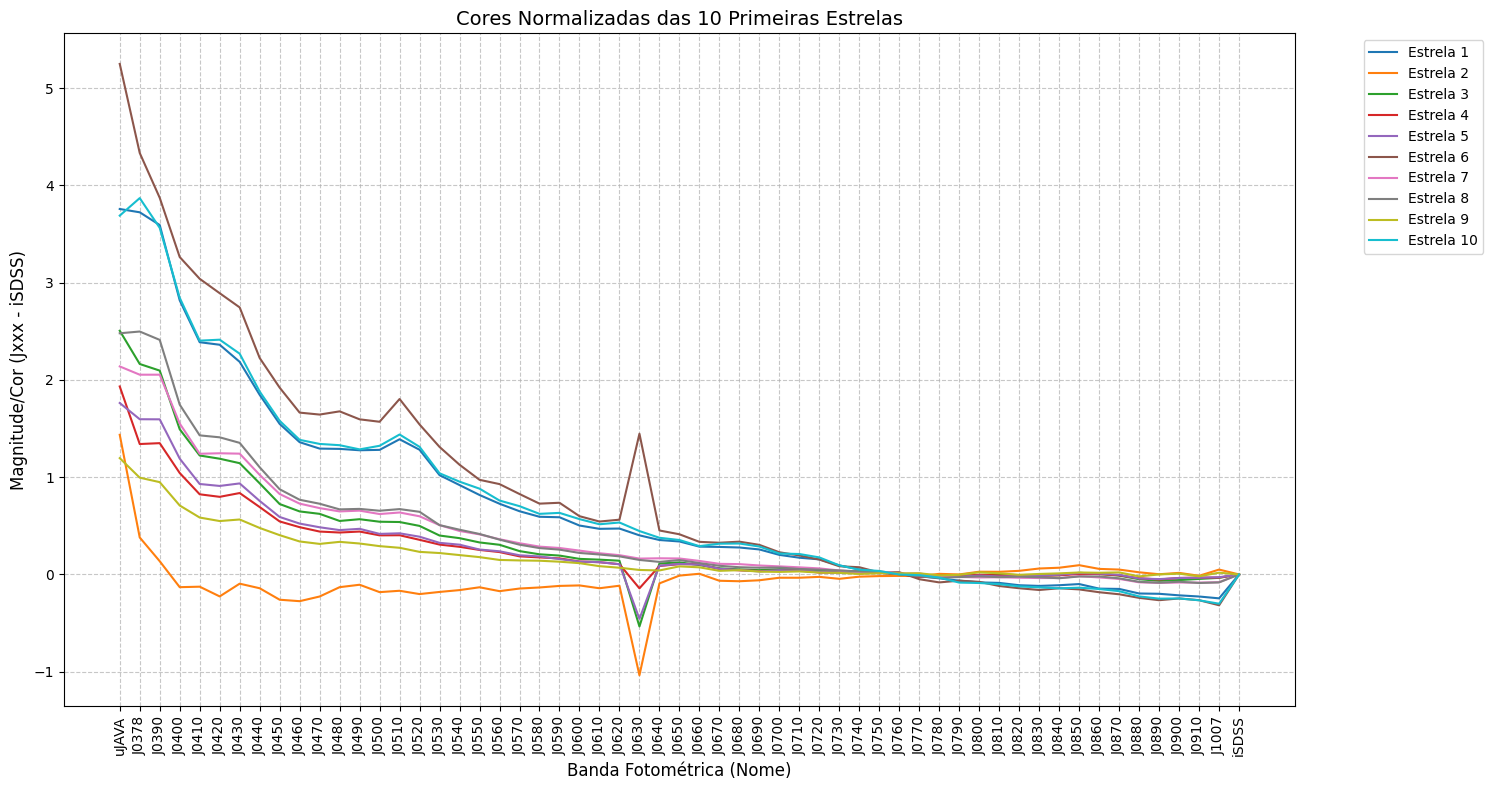

In [15]:
# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, cores_normalizadas.iloc[i], label=f'Estrela {i+1}')

# Configurações do gráfico

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)', fontsize=12)
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)', fontsize=12)
plt.title('Cores Normalizadas das 10 Primeiras Estrelas', fontsize=14)
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### 7.5.  Plotar 10 Estrelas Aleatórias (Normalizadas)

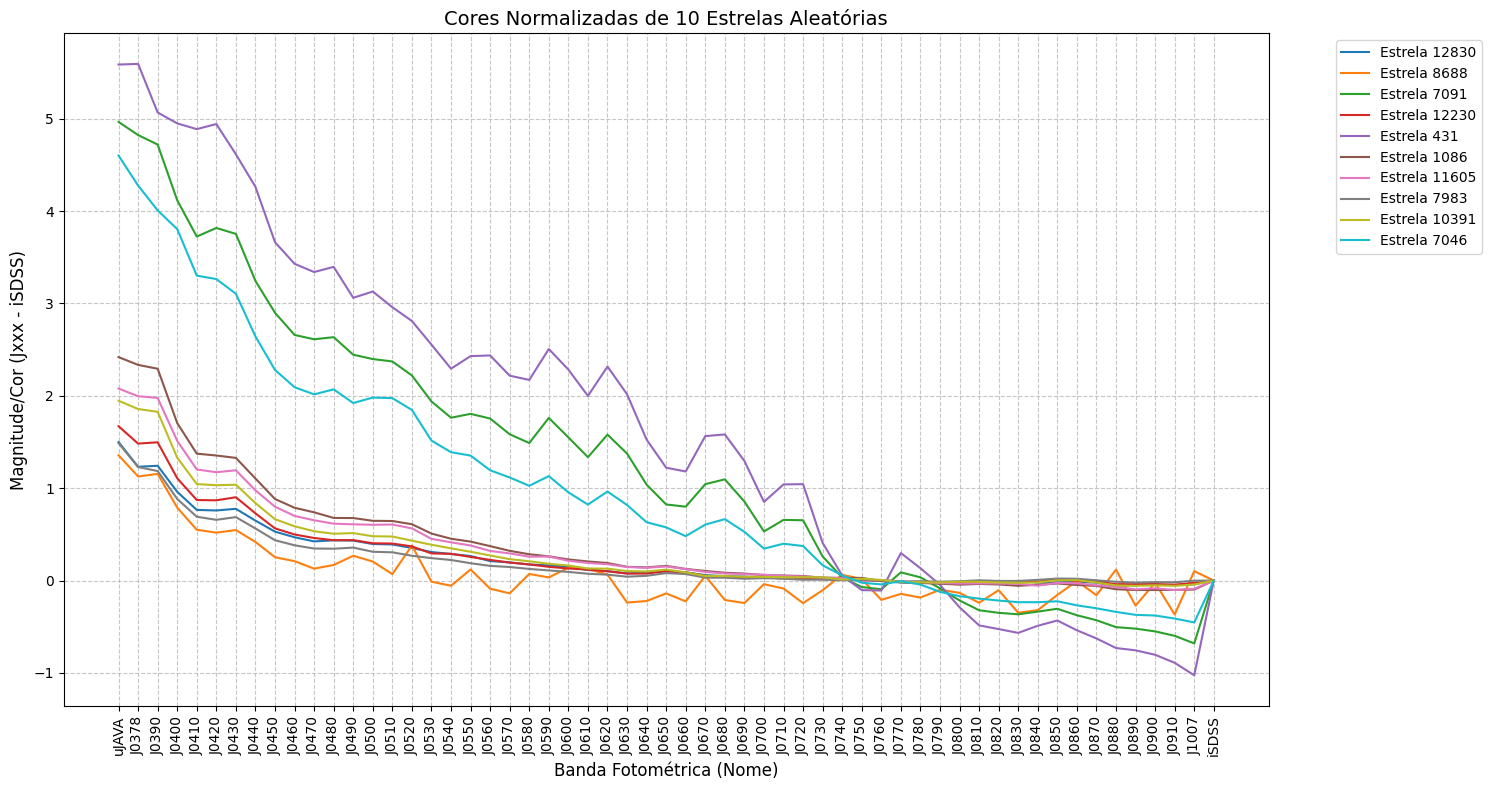

In [16]:
# Selecionar 10 estrelas aleatórias (com seed para reprodutibilidade)
np.random.seed(42)
indices_aleatorios = np.random.choice(len(df), 10, replace=False)
estrelas_aleatorias = cores_normalizadas.iloc[indices_aleatorios]

plt.figure(figsize=(15, 8))

# Plotar as estrelas aleatórias
for idx, row in estrelas_aleatorias.iterrows():
    plt.plot(filter_names, row, label=f'Estrela {idx}')

# Configurações do gráfico

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)', fontsize=12)
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)', fontsize=12)
plt.title('Cores Normalizadas de 10 Estrelas Aleatórias', fontsize=14)
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### 7.6.  Bandas com maior variação de cor

In [17]:
# Bandas com maior variação de cor
print("\nBandas com maior variação de cor:")
print(cores_normalizadas.std().sort_values(ascending=False).head(56))


Bandas com maior variação de cor:
uJAVA    1.499447
J0378    1.481042
J0390    1.391250
J0400    1.280781
J0420    1.276017
J0410    1.229675
J0430    1.206919
J0440    1.070757
J0450    0.956860
J0480    0.900474
J0460    0.884357
J0470    0.866819
J0500    0.825437
J0510    0.818613
J0490    0.816954
J0520    0.758479
J0530    0.662663
J0590    0.646354
J0550    0.633126
J0560    0.631868
J0540    0.608612
J0620    0.597839
J0600    0.571773
J0570    0.569208
J0580    0.534082
J0630    0.526652
J0610    0.505259
J0680    0.429909
J0640    0.406150
J0670    0.402749
J0690    0.350382
J0650    0.300528
J0660    0.293095
J1007    0.283979
J0710    0.268129
J0720    0.264634
J0910    0.228349
J0700    0.214687
J0880    0.212473
J0900    0.209039
J0860    0.208934
J0890    0.196301
J0810    0.188941
J0870    0.176730
J0820    0.162841
J0800    0.149458
J0830    0.148301
J0760    0.141268
J0850    0.137386
J0840    0.137384
J0790    0.124103
J0780    0.123671
J0730    0.120412
J0770    0.

### 8. Criando arquivo CSV dos dados normalizados

#### 8.1. Primeiras 10 estrelas

In [18]:
# filter_names - lista com os nomes das bandas fotométricas
# cores_normalizadas - DataFrame com os valores normalizados

# Criar o arquivo CSV
# Primeiro vamos preparar os dados para exportação
dados_exportacao = cores_normalizadas.head(10).copy()  # Pegando as 10 primeiras estrelas
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['Estrela'] = [f'Estrela {i+1}' for i in range(10)]  # Adicionando coluna de identificação

# Reorganizando as colunas para ter 'Estrela' primeiro
colunas = ['Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_estrelas.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso!')

Arquivo cores_normalizadas_estrelas.csv criado com sucesso!


### 8.2. 10 estrelas aleatórias

In [19]:
# 1. Selecionar 10 estrelas aleatórias (com seed para reprodutibilidade)
np.random.seed(42)
indices_aleatorios = np.random.choice(len(df), 10, replace=False)
estrelas_aleatorias = cores_normalizadas.iloc[indices_aleatorios]

# 2. Criar o arquivo CSV com os dados das estrelas aleatórias
# Preparar os dados para exportação
dados_exportacao = estrelas_aleatorias.copy()
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['ID_Estrela'] = indices_aleatorios  # Adicionando coluna com os IDs originais

# Reorganizando as colunas para ter 'ID_Estrela' primeiro
colunas = ['ID_Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_estrelas_aleatorias.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso!')

Arquivo cores_normalizadas_estrelas_aleatorias.csv criado com sucesso!


### 8.3. Todas as estrelas do conjunto de dados

In [20]:
# filter_names - lista com os nomes das bandas fotométricas
# cores_normalizadas - DataFrame com os valores normalizados

# Criar o arquivo CSV
# Preparar os dados para exportação (todas as estrelas)
dados_exportacao = cores_normalizadas.copy()  # Pegando todas as estrelas
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['Estrela'] = [f'Estrela {i+1}' for i in range(len(cores_normalizadas))]  # Coluna de identificação para todas

# Reorganizando as colunas para ter 'Estrela' primeiro
colunas = ['Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_todas_as_estrelas.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso! Contendo {len(cores_normalizadas)} estrelas.')

Arquivo cores_normalizadas_todas_as_estrelas.csv criado com sucesso! Contendo 17378 estrelas.


### 9. Rede SOM

*EM DESENVOLVIMENTO

In [21]:
pip install minisom

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import seaborn as sns

# Carregar os dados das estrelas já normalizados
# O arquivo 'cores_normalizadas_todas_as_estrelas.csv' foi criado anteriormente
# com as colunas sendo os nomes das bandas fotométricas e uma coluna 'Estrela'.
df = pd.read_csv('/content/cores_normalizadas_todas_as_estrelas.csv')

# Precisamos do filter_names para identificar as colunas de dados corretas
# Recarregamos o arquivo de filtros para garantir que filter_names está disponível e correto
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')
filter_names = df_filters['name'].tolist()

# Selecionar apenas as colunas que correspondem às bandas fotométricas
# As colunas no CSV exportado são os nomes das bandas listados em filter_names.
# A coluna 'Estrela' precisa ser excluída, pois não é um dado fotométrico para a SOM.
dados = df[filter_names].values

# Como os dados já estão normalizados, não precisamos aplicar MinMaxScaler
print("Dados carregados (já normalizados). Shape:", dados.shape)

Dados carregados (já normalizados). Shape: (17378, 57)


In [23]:
# Parâmetros da SOM
tamanho_x = 15  # Aumentei o tamanho para melhor resolução
tamanho_y = 15
dimensao_entrada = dados.shape[1]  # Número de características de entrada (agora correto)
iteracoes = 2000  # Aumentei as iterações para melhor convergência
taxa_aprendizado = 0.5

# Inicializar a SOM
print("\nInicializando a SOM...")
som = MiniSom(tamanho_x, tamanho_y, dimensao_entrada,
              sigma=1.5, learning_rate=taxa_aprendizado,
              neighborhood_function='gaussian', random_seed=42)


Inicializando a SOM...


In [24]:
# Inicialização dos pesos usando PCA para melhor desempenho
#som.pca_weights_init(dados)

# Treinar a SOM
print("Treinando a SOM...")
som.train_batch(dados, iteracoes, verbose=True)

Treinando a SOM...
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.4887551457425655


In [25]:
# Obter as coordenadas de cada estrela no mapa
coordenadas = np.array([som.winner(x) for x in dados])

In [26]:
# Criar um DataFrame com as coordenadas
df_coordenadas = pd.DataFrame(coordenadas, columns=['X', 'Y'])
df_resultado = pd.concat([df[['Estrela']], df_coordenadas], axis=1)

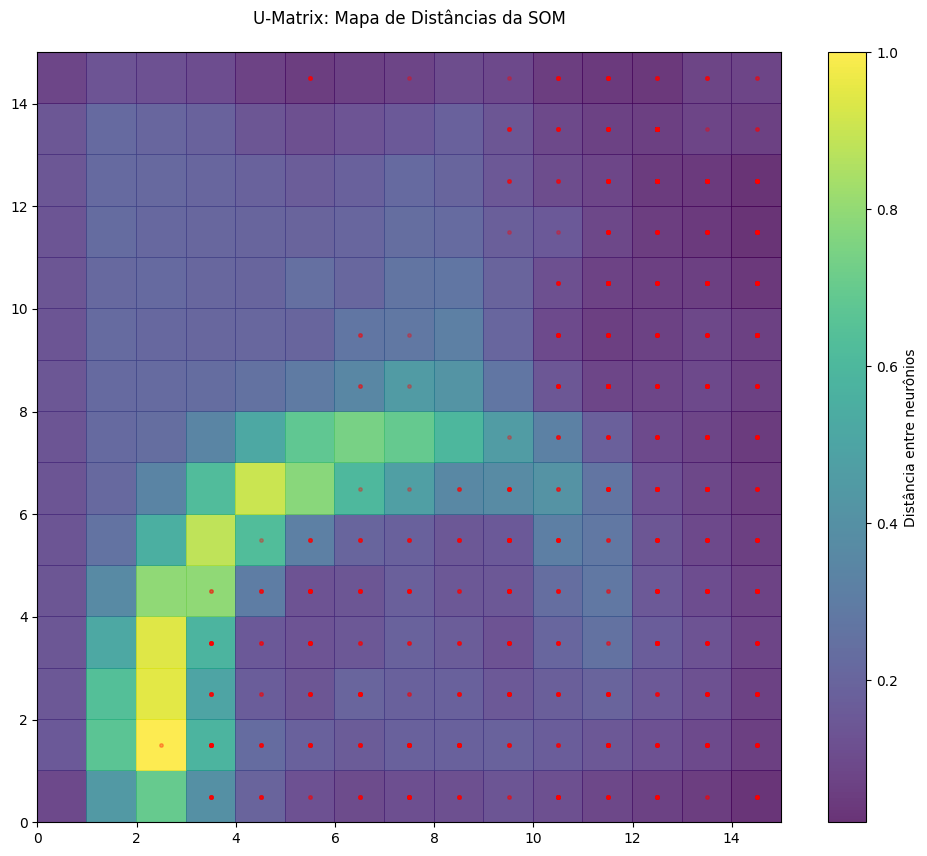

In [27]:
# 1. Visualização do mapa de distâncias (U-Matrix)
plt.figure(figsize=(12, 10))
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix: Mapa de Distâncias da SOM', pad=20)

# Adicionar pontos para as estrelas (amostra aleatória para não sobrecarregar)
np.random.seed(42)
amostra = np.random.choice(len(dados), size=1000, replace=False)
for i in amostra:
    x, y = coordenadas[i]
    plt.plot(x+0.5, y+0.5, 'r.', markersize=5, alpha=0.3)

plt.show()

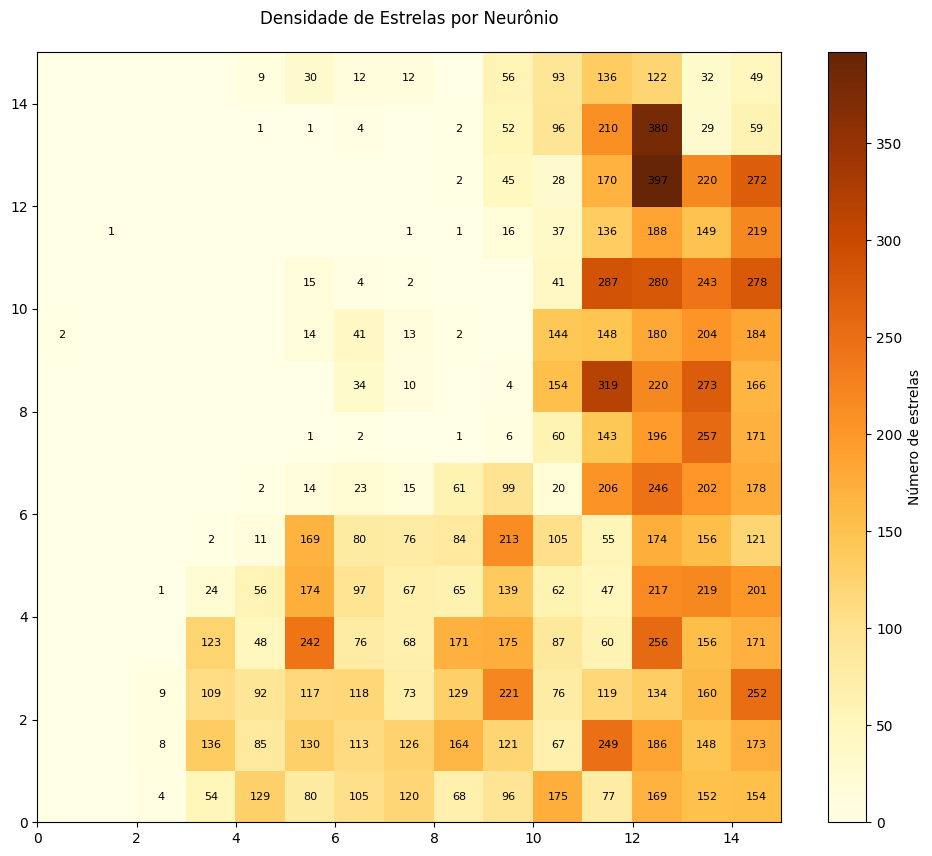

In [28]:
# 2. Visualização da densidade de estrelas por neurônio
plt.figure(figsize=(12, 10))
contagem = np.zeros((tamanho_x, tamanho_y))
for x, y in coordenadas:
    contagem[x][y] += 1

plt.pcolor(contagem.T, cmap='YlOrBr')
plt.colorbar(label='Número de estrelas')
plt.title('Densidade de Estrelas por Neurônio', pad=20)

# Adicionar os valores de contagem
for i in range(tamanho_x):
    for j in range(tamanho_y):
        if contagem[i,j] > 0:
            plt.text(i+0.5, j+0.5, f'{int(contagem[i,j])}',
                     ha='center', va='center', color='black', fontsize=8)

plt.show()


Agrupando neurônios por similaridade...


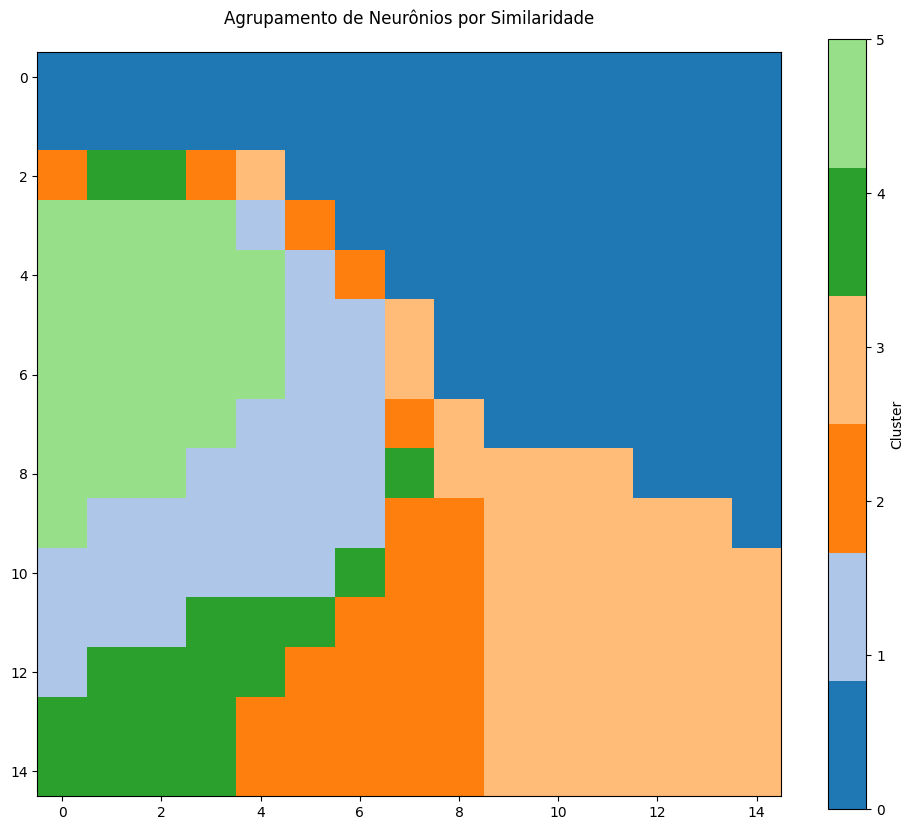

In [29]:
# 3. Agrupamento dos neurônios por similaridade
print("\nAgrupando neurônios por similaridade...")
n_clusters = 6  # Número de clusters
pesos = som.get_weights().reshape(-1, dimensao_entrada)
# Usar n_init para evitar warning do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Adicionado n_init=10
kmeans.fit(pesos)

# Mapear cada neurônio para um cluster
clusters_neurônios = kmeans.labels_.reshape(tamanho_x, tamanho_y)

# Visualizar os clusters no mapa
plt.figure(figsize=(12, 10))
# Usar ListedColormap para garantir compatibilidade com versões mais recentes do matplotlib
cmap = ListedColormap([plt.cm.tab20(i) for i in range(n_clusters)])
plt.imshow(clusters_neurônios, cmap=cmap)
plt.colorbar(ticks=range(n_clusters), label='Cluster')
plt.title('Agrupamento de Neurônios por Similaridade', pad=20)
plt.show()

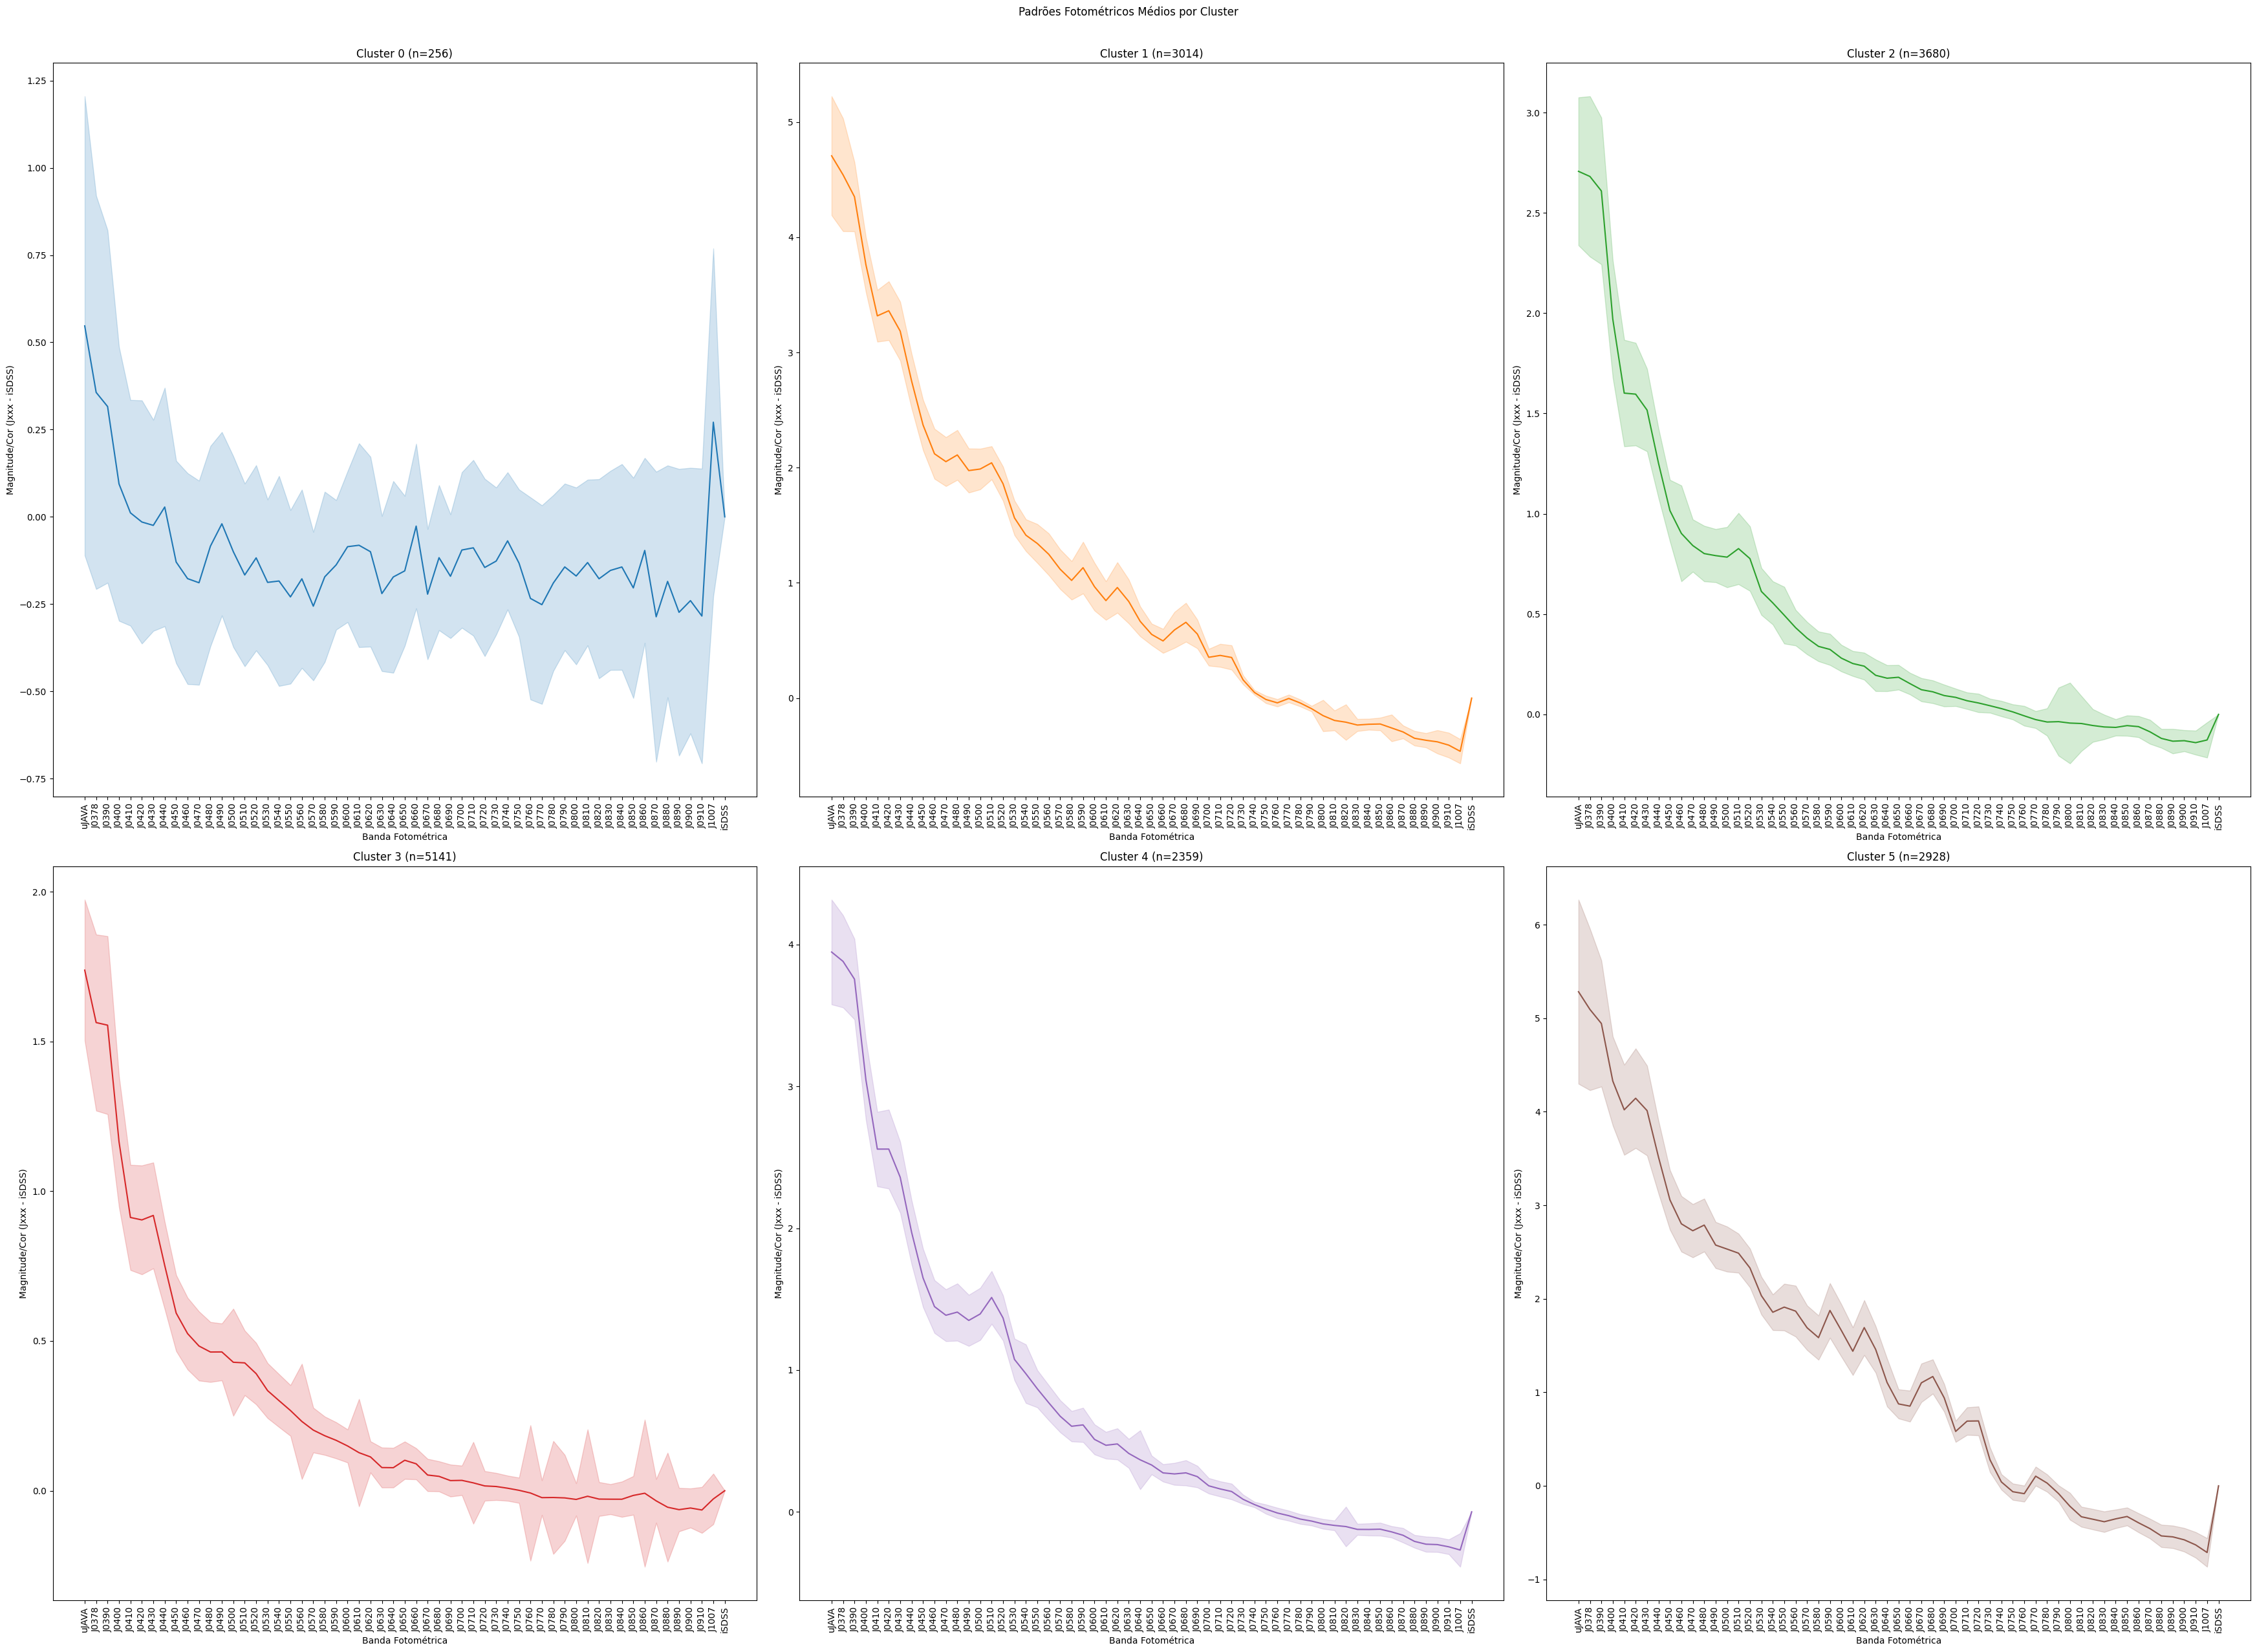

In [30]:
# Determinar o cluster de cada estrela
df_resultado['Cluster'] = [clusters_neurônios[x][y] for x, y in coordenadas]

# 4. Visualização das curvas médias por cluster
plt.figure(figsize=(35, 25))
for cluster in range(n_clusters):
    # Obter estrelas do cluster
    # Nota: df_resultado.index e dados.index não são diretamente correspondentes
    # Se a ordem dos dados no array 'dados' for a mesma do DataFrame 'df_resultado',
    # podemos usar os índices diretamente. No entanto, é mais seguro
    # usar a coluna 'Estrela' ou o índice original do df se necessário.
    # Como criamos df_resultado diretamente das coordenadas geradas a partir de 'dados',
    # os índices devem corresponder à ordem original.
    indices = df_resultado[df_resultado['Cluster'] == cluster].index
    dados_cluster = dados[indices]

    # Calcular média e desvio padrão
    media = np.mean(dados_cluster, axis=0)
    desvio = np.std(dados_cluster, axis=0)

    plt.subplot(2, 3, cluster+1)
    plt.plot(filter_names, media, color=f'C{cluster}', label=f'Cluster {cluster}') # Usar filter_names no eixo X
    plt.fill_between(filter_names, media-desvio, media+desvio, # Usar filter_names no fill_between
                    color=f'C{cluster}', alpha=0.2)
    plt.title(f'Cluster {cluster} (n={len(indices)})')
    # Ajuste os limites do eixo Y se necessário, com base nos valores normalizados
    # plt.ylim(0, 1) # Com dados normalizados (J-iSDSS), os valores podem ser negativos
    plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)') # Rótulo correto
    plt.xlabel('Banda Fotométrica') # Rótulo correto
    plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização


plt.tight_layout()
plt.suptitle('Padrões Fotométricos Médios por Cluster', y=1.02)
plt.show()

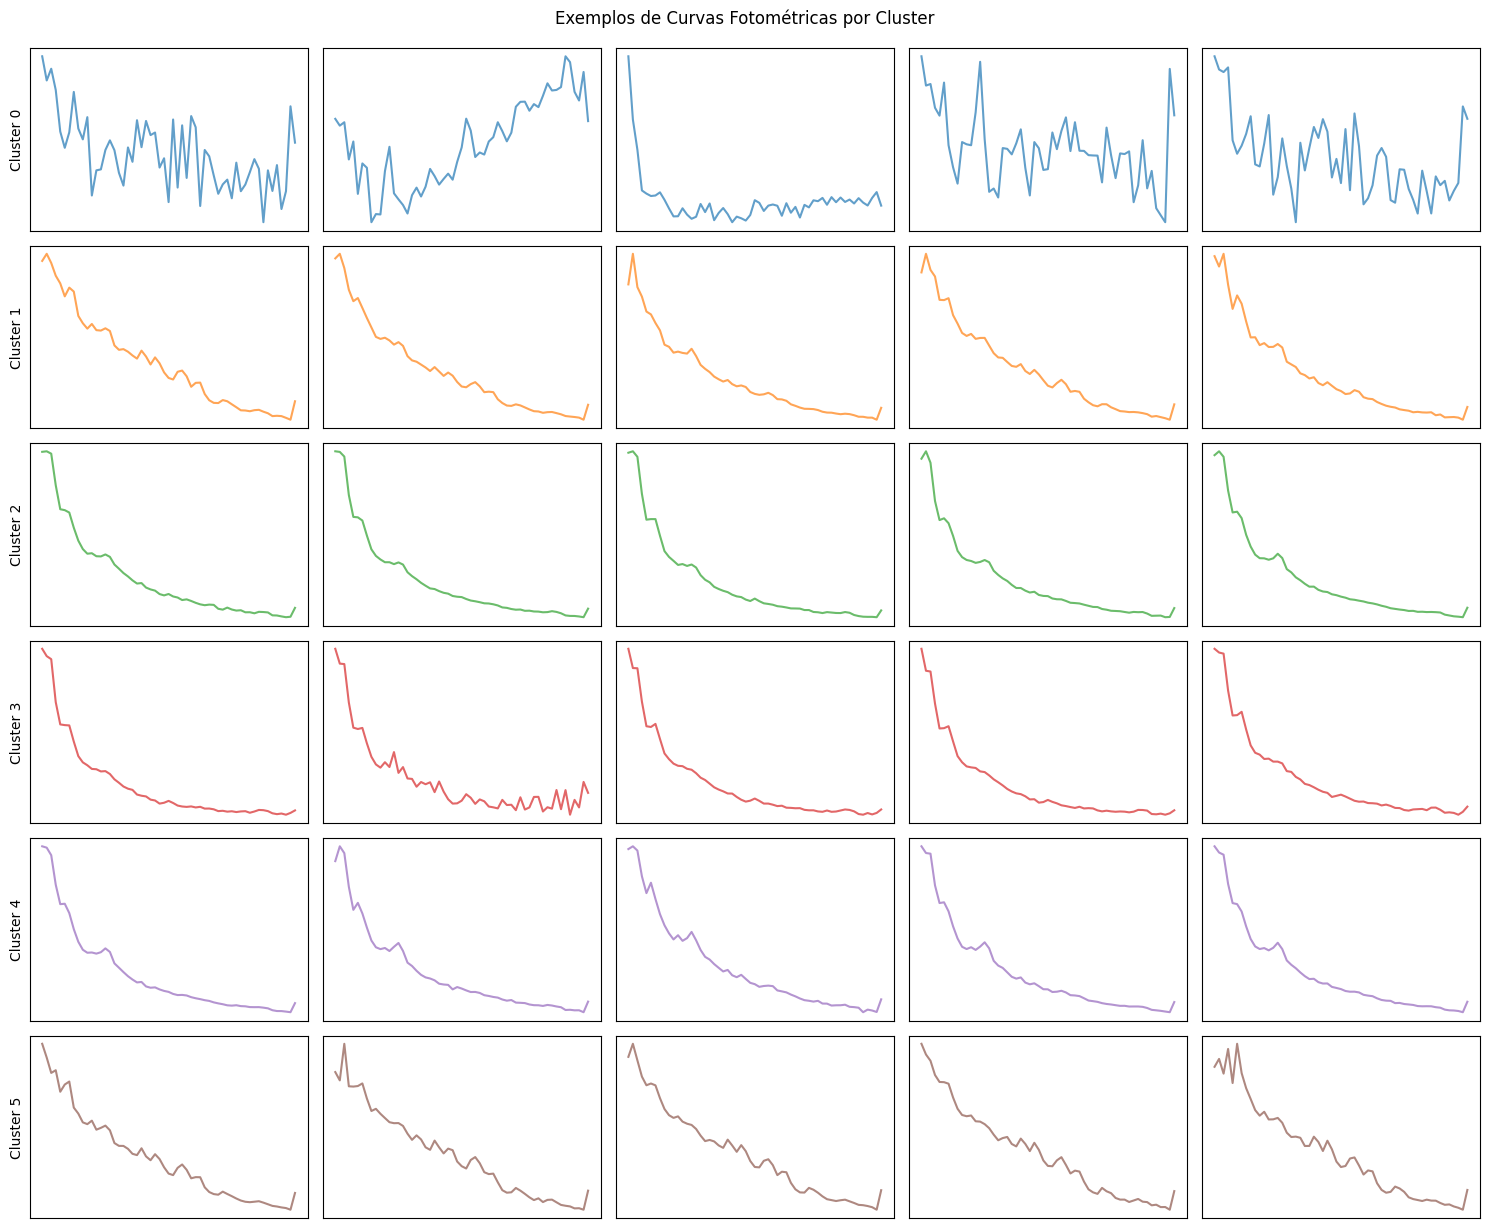

In [31]:
# 5. Visualização de exemplos aleatórios por cluster
plt.figure(figsize=(15, 12))
np.random.seed(42)
for cluster in range(n_clusters):
    # Selecionar 5 estrelas aleatórias do cluster
    indices = df_resultado[df_resultado['Cluster'] == cluster].index
    # Adicionado verificação para garantir que há estrelas no cluster antes de amostrar
    if len(indices) > 0:
        amostra = np.random.choice(indices, size=min(5, len(indices)), replace=False) # Amostra no máximo o número disponível

        for i, idx in enumerate(amostra):
            plt.subplot(n_clusters, 5, cluster*5 + i + 1)
            plt.plot(filter_names, dados[idx], color=f'C{cluster}', alpha=0.7) # Usar filter_names no eixo X
            # plt.ylim(0, 1) # Ajustar limite Y se necessário
            plt.xticks([]) # Remover rótulos do eixo X para subplots individuais
            plt.yticks([]) # Remover rótulos do eixo Y para subplots individuais
            if i == 0:
                 plt.ylabel(f'Cluster {cluster}')
            # Remover xlabel duplicado
            # if cluster == n_clusters-1:
            #     plt.xlabel('Banda')
    else:
        print(f"Cluster {cluster} está vazio. Pulando visualização de exemplos.")

plt.tight_layout()
plt.suptitle('Exemplos de Curvas Fotométricas por Cluster', y=1.02)
plt.show()

/tmp/ipython-input-3003050918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x='Cluster', palette='tab20')


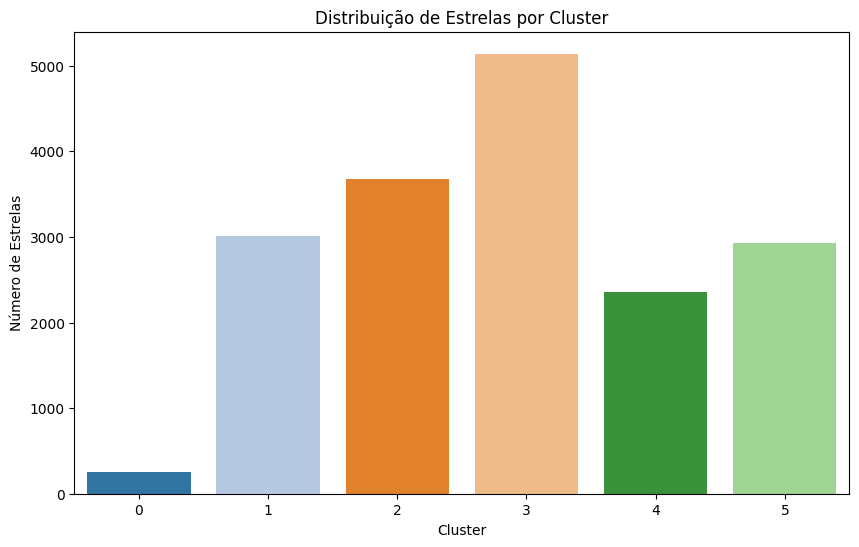

In [32]:
# 6. Visualização da distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resultado, x='Cluster', palette='tab20')
plt.title('Distribuição de Estrelas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Estrelas')
plt.show()

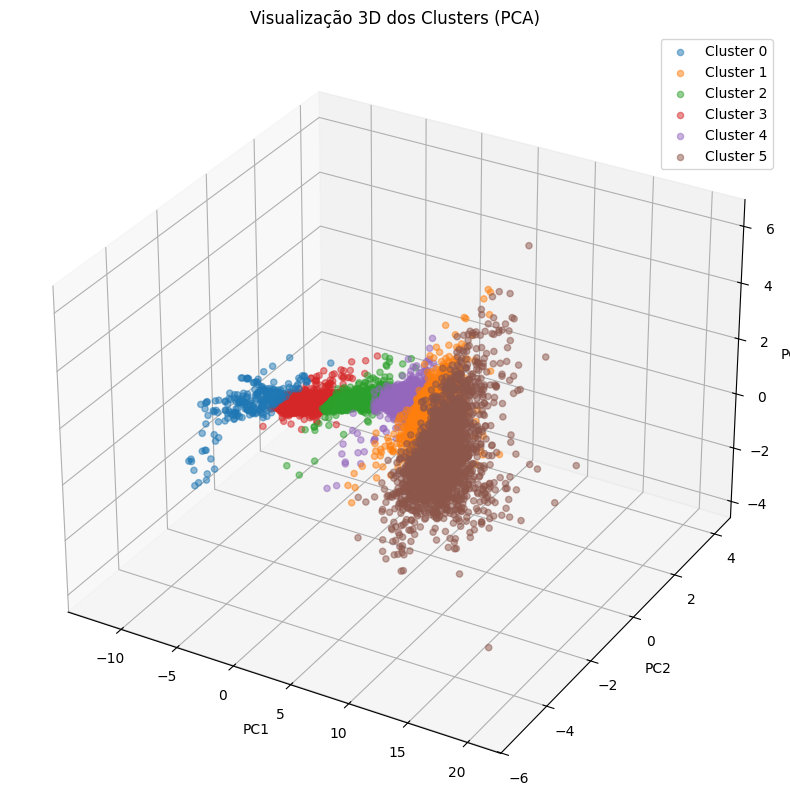

In [33]:
# 7. Visualização 3D
try:
    from mpl_toolkits.mplot3d import Axes3D

    # Redução dimensional para visualização (usando as 3 primeiras componentes principais)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    dados_3d = pca.fit_transform(dados)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(n_clusters):
        indices = df_resultado[df_resultado['Cluster'] == cluster].index
        # Adicionado verificação para garantir que há estrelas no cluster antes de plotar
        if len(indices) > 0:
            ax.scatter(dados_3d[indices, 0], dados_3d[indices, 1], dados_3d[indices, 2],
                      label=f'Cluster {cluster}', alpha=0.5)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('Visualização 3D dos Clusters (PCA)')
    plt.legend()
    plt.show()
except ImportError:
    print("\nVisualização 3D não disponível (requer matplotlib 3D)")

In [34]:
# Salvar os resultados
df_resultado.to_csv('estrelas_clusterizadas_som.csv', index=False)
print("\nResultados salvos em 'estrelas_clusterizadas_som.csv'")

# Informações adicionais
print("\nResumo da análise:")
print(f"- Total de estrelas analisadas: {len(df_resultado)}")
print(f"- Tamanho do mapa SOM: {tamanho_x}x{tamanho_y} neurônios")
print(f"- Número de clusters identificados: {n_clusters}")
for cluster in range(n_clusters):
    n = sum(df_resultado['Cluster'] == cluster)
    print(f"  Cluster {cluster}: {n} estrelas ({n/len(df_resultado)*100:.1f}%)")


Resultados salvos em 'estrelas_clusterizadas_som.csv'

Resumo da análise:
- Total de estrelas analisadas: 17378
- Tamanho do mapa SOM: 15x15 neurônios
- Número de clusters identificados: 6
  Cluster 0: 256 estrelas (1.5%)
  Cluster 1: 3014 estrelas (17.3%)
  Cluster 2: 3680 estrelas (21.2%)
  Cluster 3: 5141 estrelas (29.6%)
  Cluster 4: 2359 estrelas (13.6%)
  Cluster 5: 2928 estrelas (16.8%)


### 10. Rede SOM

TESTE 2

*EM DESENVOLVIMENTO

Análise e Melhorias para a Rede SOM

### 10.1 Análise do Erro de Quantização

Para entender melhor o treinamento da SOM, vamos modificar o código para:
- Registrar o erro de quantização durante o treinamento
- Plotar a curva de aprendizado
- Testar diferentes configurações de hiperparâmetros


Initializando a SOM...

Treinando a SOM e registrando erros...


  1%|▏         | 27/2000 [00:07<05:52,  5.59it/s]/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
100%|██████████| 2000/2000 [06:24<00:00,  5.20it/s]


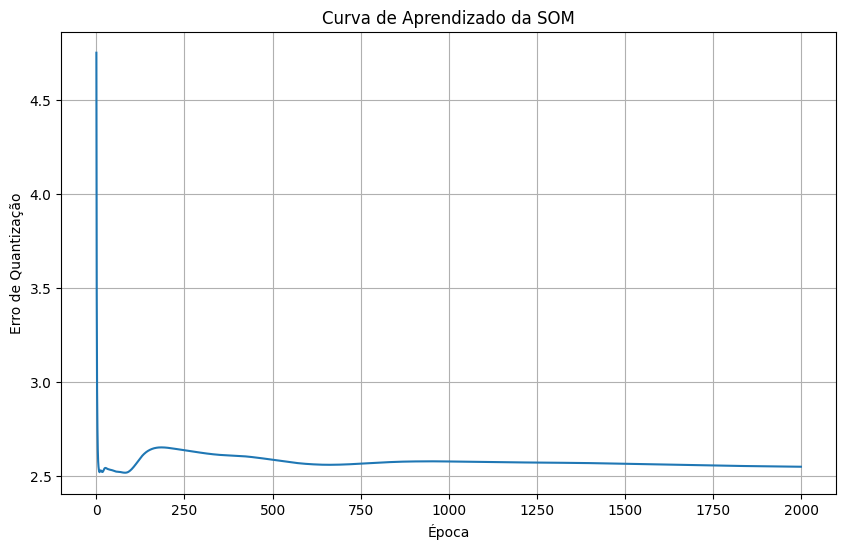


Erro de quantização final: 2.5498


In [35]:

from tqdm import tqdm
import matplotlib.pyplot as plt

# Função para treinar a SOM e registrar o erro
def train_som_with_tracking(som, data, num_epochs):
    quantization_errors = []
    for epoch in tqdm(range(num_epochs)):
        som.train_batch(data, 1, verbose=False)  # Treina 1 época
        q_error = som.quantization_error(data)
        quantization_errors.append(q_error)
    return quantization_errors

# Parâmetros da SOM
tamanho_x = 15
tamanho_y = 15
dimensao_entrada = dados.shape[1]
iteracoes = 2000
taxa_aprendizado = 0.5

# Inicializar a SOM
print("\nInitializando a SOM...")
som = MiniSom(tamanho_x, tamanho_y, dimensao_entrada,
              sigma=1.5, learning_rate=taxa_aprendizado,
              neighborhood_function='gaussian', random_seed=42)

# Treinar a SOM e registrar erros
print("\nTreinando a SOM e registrando erros...")
quantization_errors = train_som_with_tracking(som, dados, iteracoes)

# Plotar curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(quantization_errors)
plt.title('Curva de Aprendizado da SOM')
plt.xlabel('Época')
plt.ylabel('Erro de Quantização')
plt.grid(True)
plt.show()

# Mostrar erro final
print(f"\nErro de quantização final: {quantization_errors[-1]:.4f}")

### 10.2 Análise da U-Matrix e Densidade de Estrelas

Vamos melhorar a visualização para entender melhor a relação entre a U-Matrix e a distribuição dos dados:

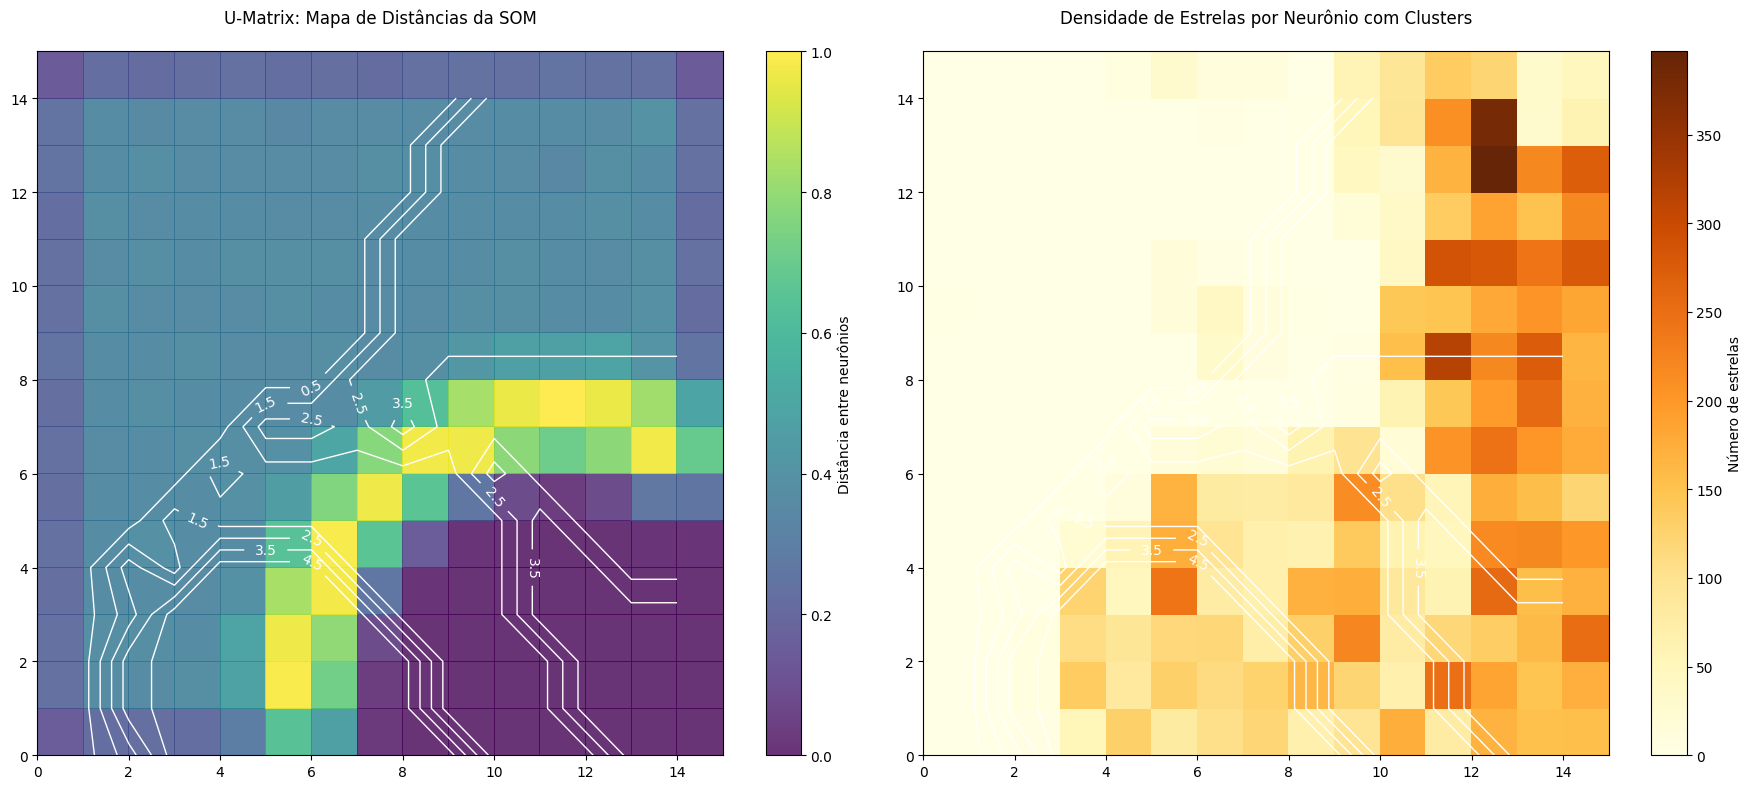

In [36]:
# Visualização melhorada da U-Matrix e densidade

plt.figure(figsize=(18, 8))

# Subplot 1: U-Matrix
plt.subplot(1, 2, 1)
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix: Mapa de Distâncias da SOM', pad=20)

# Adicionar contornos dos clusters identificados
contour = plt.contour(clusters_neurônios.T, levels=np.arange(-0.5, n_clusters),
                     colors='white', linewidths=1)
plt.clabel(contour, inline=True, fontsize=10)

# Subplot 2: Densidade com clusters
plt.subplot(1, 2, 2)
plt.pcolor(contagem.T, cmap='YlOrBr')
plt.colorbar(label='Número de estrelas')
plt.title('Densidade de Estrelas por Neurônio com Clusters', pad=20)

# Adicionar os mesmos contornos
contour = plt.contour(clusters_neurônios.T, levels=np.arange(-0.5, n_clusters),
                     colors='white', linewidths=1)
plt.clabel(contour, inline=True, fontsize=10)

plt.tight_layout()
plt.show()

### 10.3 Experimentos com Diferentes Configurações

Vamos criar uma função para testar diferentes configurações:


Testando configuração: {'x': 15, 'y': 15, 'sigma': 1.5, 'learning_rate': 0.5, 'epochs': 2000}


100%|██████████| 2000/2000 [06:39<00:00,  5.00it/s]


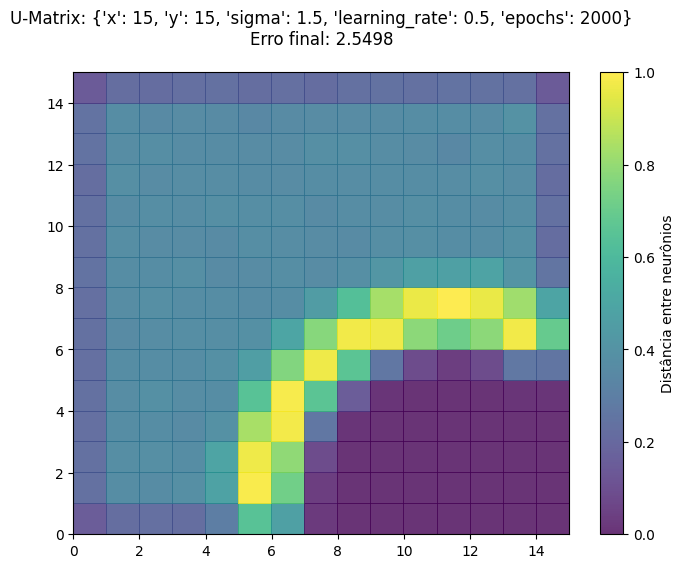


Testando configuração: {'x': 15, 'y': 15, 'sigma': 1.0, 'learning_rate': 0.3, 'epochs': 2000}


100%|██████████| 2000/2000 [06:16<00:00,  5.31it/s]


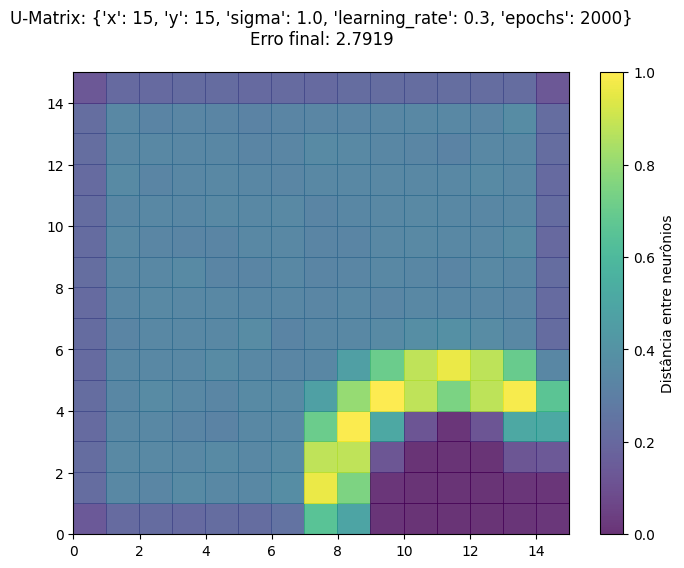


Testando configuração: {'x': 20, 'y': 20, 'sigma': 2.0, 'learning_rate': 0.7, 'epochs': 3000}


100%|██████████| 3000/3000 [13:51<00:00,  3.61it/s]


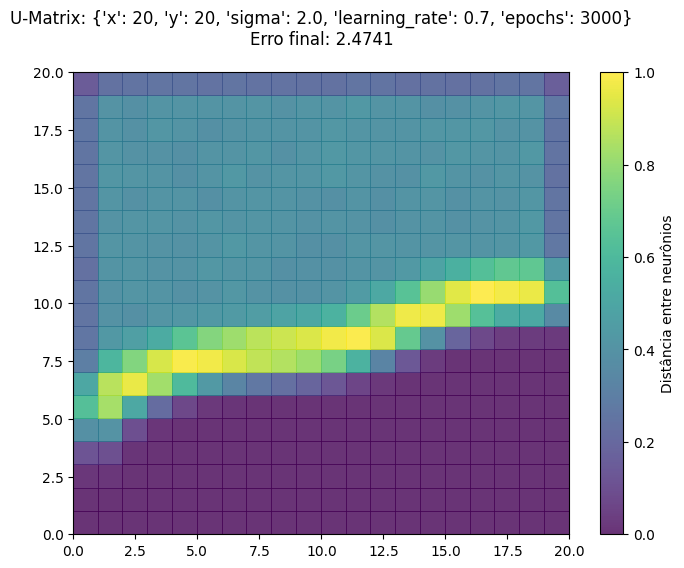


Testando configuração: {'x': 10, 'y': 10, 'sigma': 1.2, 'learning_rate': 0.4, 'epochs': 1500}


100%|██████████| 1500/1500 [03:00<00:00,  8.30it/s]


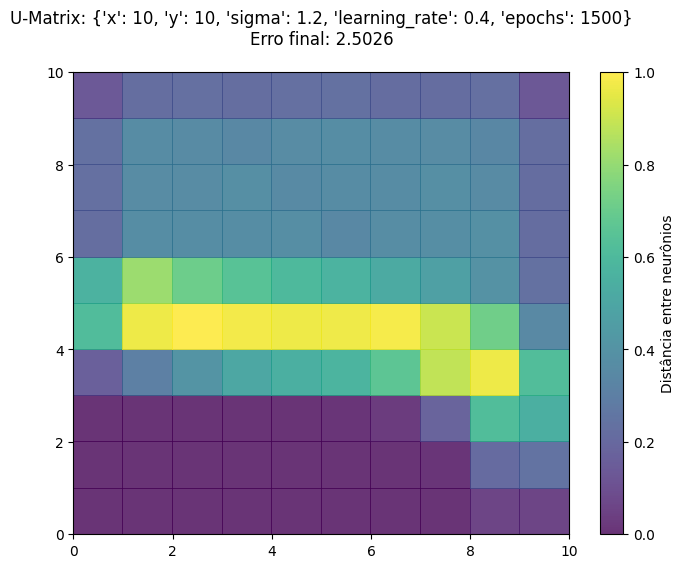


Comparação de erros finais:
Config 1: {'x': 15, 'y': 15, 'sigma': 1.5, 'learning_rate': 0.5, 'epochs': 2000} - Erro: 2.5498
Config 2: {'x': 15, 'y': 15, 'sigma': 1.0, 'learning_rate': 0.3, 'epochs': 2000} - Erro: 2.7919
Config 3: {'x': 20, 'y': 20, 'sigma': 2.0, 'learning_rate': 0.7, 'epochs': 3000} - Erro: 2.4741
Config 4: {'x': 10, 'y': 10, 'sigma': 1.2, 'learning_rate': 0.4, 'epochs': 1500} - Erro: 2.5026


In [37]:
def test_som_configurations(data, configs):
    results = []

    for config in configs:
        print(f"\nTestando configuração: {config}")

        # Inicializar SOM
        som = MiniSom(config['x'], config['y'], data.shape[1],
                     sigma=config['sigma'],
                     learning_rate=config['learning_rate'],
                     neighborhood_function='gaussian',
                     random_seed=42)

        # Treinar e registrar erros
        errors = train_som_with_tracking(som, data, config['epochs'])

        # Resultados
        results.append({
            'config': config,
            'som': som,
            'errors': errors,
            'final_error': errors[-1]
        })

        # Plotar U-Matrix
        plt.figure(figsize=(8, 6))
        plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
        plt.colorbar(label='Distância entre neurônios')
        plt.title(f"U-Matrix: {config}\nErro final: {errors[-1]:.4f}", pad=20)
        plt.show()

    return results

# Configurações para testar
configurations = [
    {'x': 15, 'y': 15, 'sigma': 1.5, 'learning_rate': 0.5, 'epochs': 2000},
    {'x': 15, 'y': 15, 'sigma': 1.0, 'learning_rate': 0.3, 'epochs': 2000},
    {'x': 20, 'y': 20, 'sigma': 2.0, 'learning_rate': 0.7, 'epochs': 3000},
    {'x': 10, 'y': 10, 'sigma': 1.2, 'learning_rate': 0.4, 'epochs': 1500}
]

# Executar testes
results = test_som_configurations(dados, configurations)

# Mostrar comparação de erros finais
print("\nComparação de erros finais:")
for i, res in enumerate(results):
    print(f"Config {i+1}: {res['config']} - Erro: {res['final_error']:.4f}")

### 10.4 Análise dos Pontos de Amostra

Vamos modificar a visualização para entender melhor a distribuição:

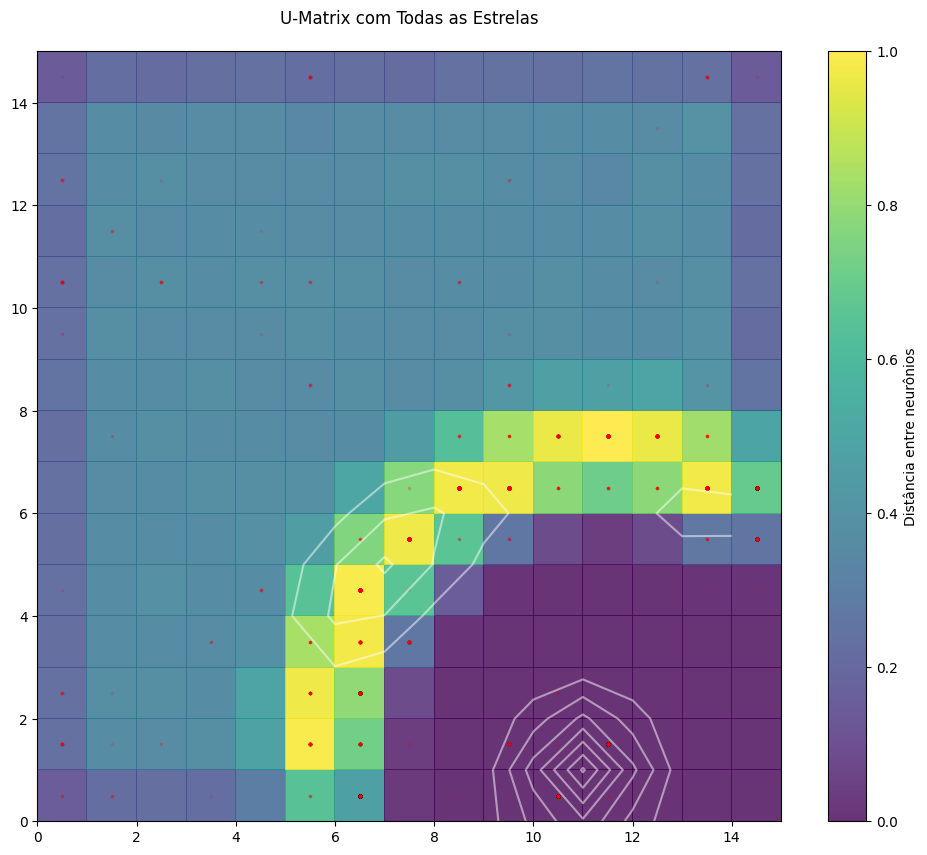

In [38]:
# Visualização melhorada da distribuição dos dados na SOM

# Obter todas as coordenadas (não apenas amostra)
coordenadas_completas = np.array([som.winner(x) for x in dados])

# Plotar
plt.figure(figsize=(12, 10))
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix com Todas as Estrelas', pad=20)

# Plotar todas as estrelas com transparência
for x, y in coordenadas_completas:
    plt.plot(x+0.5, y+0.5, 'r.', markersize=3, alpha=0.1)

# Adicionar densidade como contorno
from scipy.ndimage import gaussian_filter
density = np.zeros((tamanho_x, tamanho_y))
for x, y in coordenadas_completas:
    density[x, y] += 1
density = gaussian_filter(density, sigma=0.8)
plt.contour(density.T, colors='white', alpha=0.5)

plt.show()

### 11. Rede SOM: Variações e Análises

#### 11.1. Variar o valor de K no K-means

In [39]:
# Testar diferentes valores de K
k_values = range(3, 11)
results_kmeans = {}

for n_clusters in k_values:
    print(f"\nTestando K = {n_clusters} clusters...")

    # Usar K-means nos pesos da SOM
    pesos = som.get_weights().reshape(-1, dimensao_entrada)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(pesos)

    # Mapear cada neurônio para um cluster
    clusters_neurônios = kmeans.labels_.reshape(tamanho_x, tamanho_y)

    # Determinar o cluster de cada estrela
    df_resultado[f'Cluster_K{n_clusters}'] = [clusters_neurônios[x][y] for x, y in coordenadas]

    # Verificar se existe um cluster diferente (pequeno e distinto)
    cluster_sizes = df_resultado[f'Cluster_K{n_clusters}'].value_counts()
    smallest_cluster = cluster_sizes.idxmin()
    smallest_size = cluster_sizes.min()
    smallest_percentage = (smallest_size / len(df_resultado)) * 100

    results_kmeans[n_clusters] = {
        'smallest_cluster': smallest_cluster,
        'smallest_size': smallest_size,
        'smallest_percentage': smallest_percentage,
        'all_sizes': cluster_sizes.to_dict()
    }

    print(f"K={n_clusters}: Cluster menor = {smallest_cluster}, tamanho = {smallest_size} ({smallest_percentage:.1f}%)")


Testando K = 3 clusters...
K=3: Cluster menor = 2, tamanho = 1138 (6.5%)

Testando K = 4 clusters...
K=4: Cluster menor = 2, tamanho = 76 (0.4%)

Testando K = 5 clusters...
K=5: Cluster menor = 4, tamanho = 685 (3.9%)

Testando K = 6 clusters...
K=6: Cluster menor = 2, tamanho = 412 (2.4%)

Testando K = 7 clusters...
K=7: Cluster menor = 6, tamanho = 377 (2.2%)

Testando K = 8 clusters...
K=8: Cluster menor = 6, tamanho = 377 (2.2%)

Testando K = 9 clusters...
K=9: Cluster menor = 6, tamanho = 377 (2.2%)

Testando K = 10 clusters...
K=10: Cluster menor = 7, tamanho = 377 (2.2%)



=== RESUMO DA ANÁLISE DE DIFERENTES VALORES DE K ===
K=3: Cluster menor tem 1138 estrelas (6.5%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


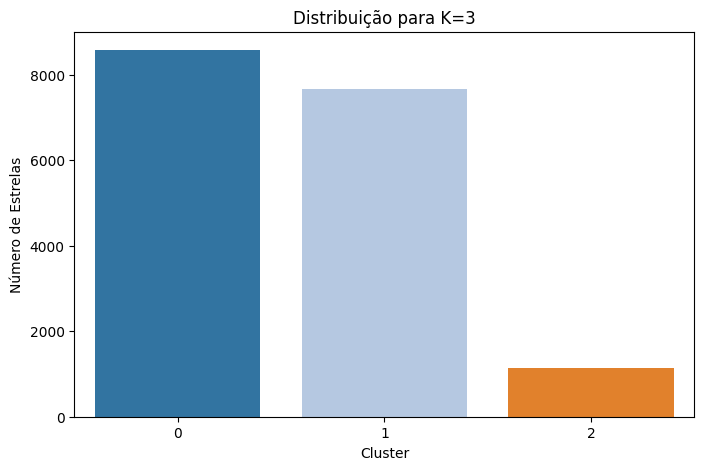

K=4: Cluster menor tem 76 estrelas (0.4%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


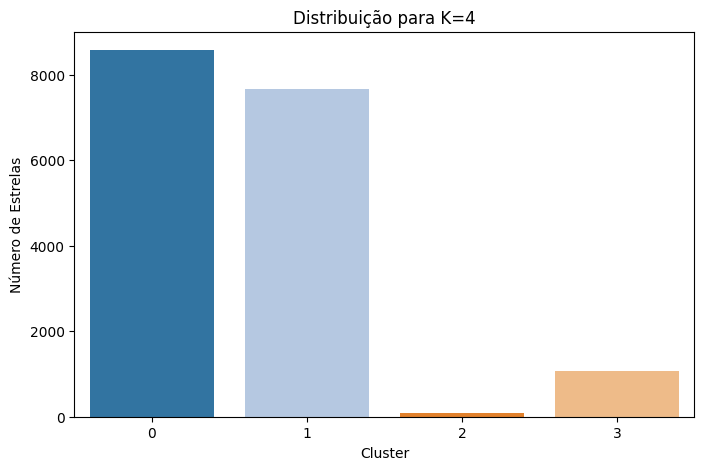

/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


K=5: Cluster menor tem 685 estrelas (3.9%)


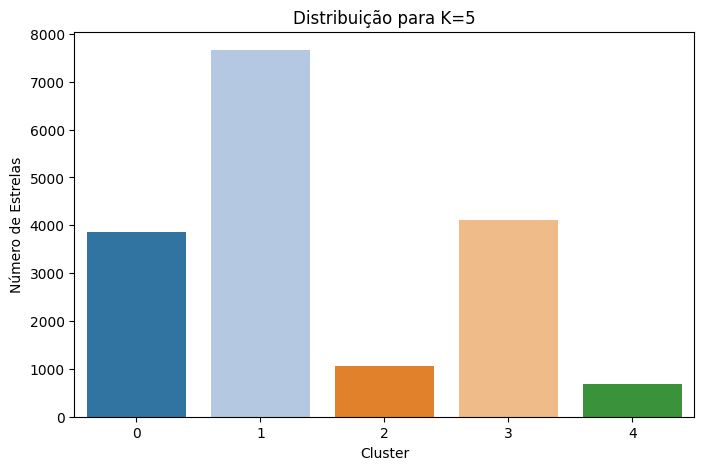

K=6: Cluster menor tem 412 estrelas (2.4%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


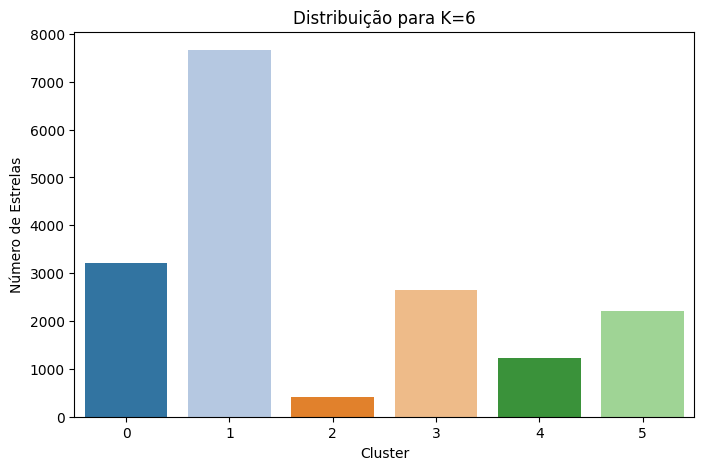

K=7: Cluster menor tem 377 estrelas (2.2%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


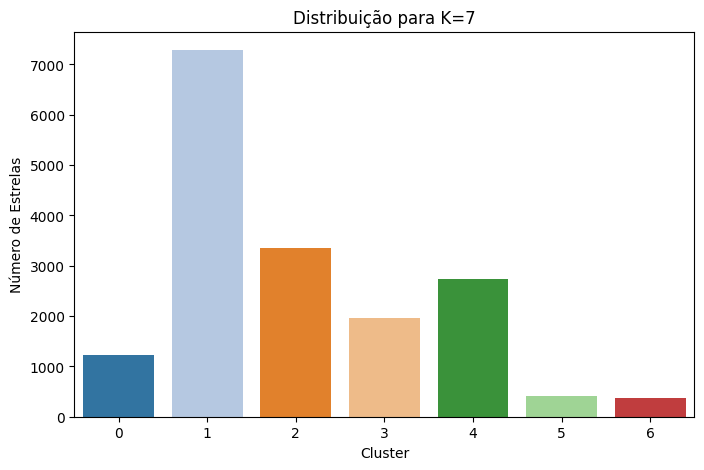

K=8: Cluster menor tem 377 estrelas (2.2%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


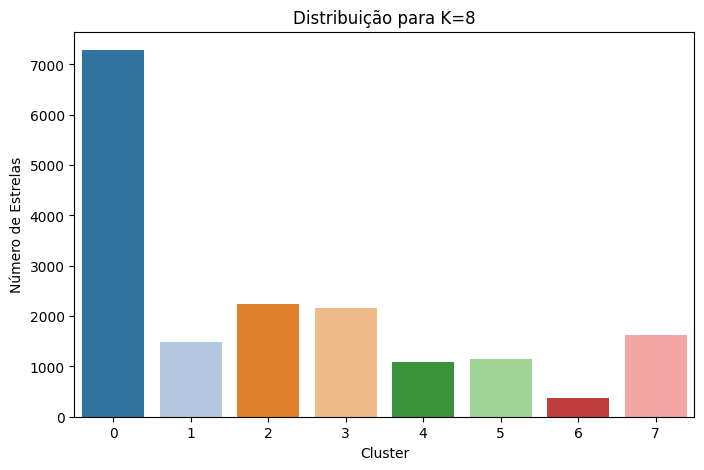

K=9: Cluster menor tem 377 estrelas (2.2%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


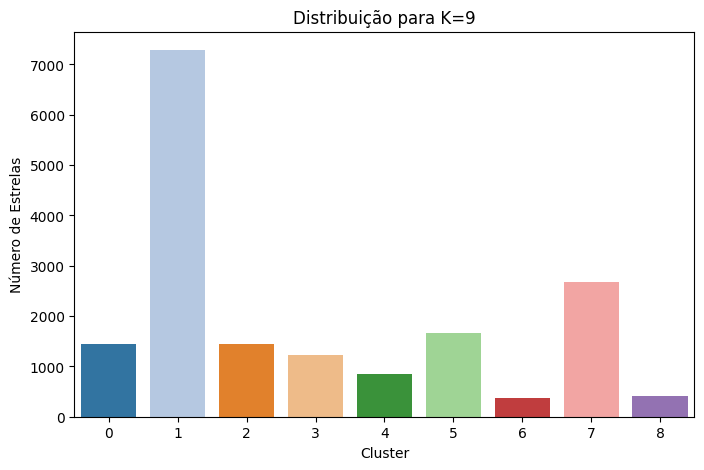

K=10: Cluster menor tem 377 estrelas (2.2%)


/tmp/ipython-input-2296364819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')


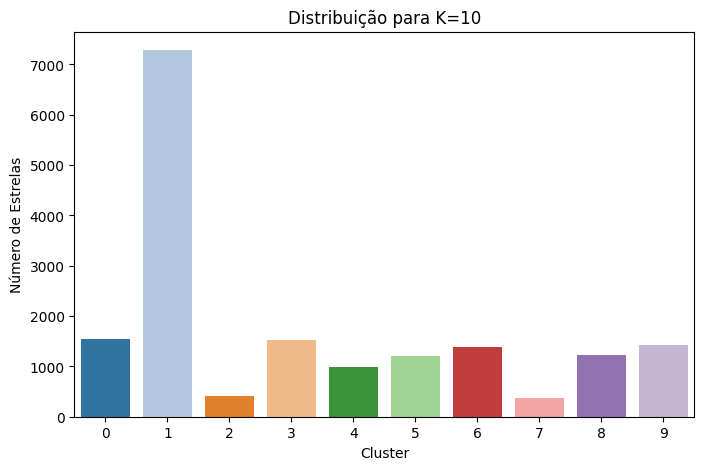

In [40]:
# Exibir resultados
print("\n=== RESUMO DA ANÁLISE DE DIFERENTES VALORES DE K ===")
for k, result in results_kmeans.items():
    print(f"K={k}: Cluster menor tem {result['smallest_size']} estrelas ({result['smallest_percentage']:.1f}%)")

    # Plotar distribuição para cada K
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_resultado, x=f'Cluster_K{k}', palette='tab20')
    plt.title(f'Distribuição para K={k}')
    plt.xlabel('Cluster')
    plt.ylabel('Número de Estrelas')
    plt.show()

#### 11.2. Análise do Cluster 0 com Ferramentas de VO

In [41]:
# Análise detalhada do cluster diferente
def analisar_cluster_diferente(df_original, df_resultado, cluster_col='Cluster'):
    """
    Analisa o cluster menor (diferente) em detalhe
    """
    # Encontrar o cluster menor
    cluster_counts = df_resultado[cluster_col].value_counts()
    cluster_diferente = cluster_counts.idxmin()

    print(f"=== ANÁLISE DO CLUSTER DIFERENTE ({cluster_diferente}) ===")
    print(f"Tamanho: {cluster_counts.min()} estrelas ({cluster_counts.min()/len(df_resultado)*100:.1f}%)")

    # Obter índices das estrelas no cluster diferente
    indices_diferente = df_resultado[df_resultado[cluster_col] == cluster_diferente].index

    # Analisar propriedades dessas estrelas
    estrelas_diferente = df_original.iloc[indices_diferente].copy()

    print("\nEstatísticas das estrelas do cluster diferente:")

    # Verificar quais colunas existem no DataFrame original
    print("Colunas disponíveis no DataFrame original:")
    print(df_original.columns.tolist())

    # Analisar paralaxe (usando os nomes corretos das colunas)
    if 'Plx' in df_original.columns:
        print("Paralaxes:")
        print(estrelas_diferente['Plx'].describe())
    elif 'PK' in df_original.columns:
        print("Paralaxes (coluna PK):")
        print(estrelas_diferente['PK'].describe())
    else:
        print("Coluna de paralaxe não encontrada")

    # Analisar erro relativo de paralaxe
    if 'erro_relativo_paralaxe' in df_original.columns:
        print("\nErros relativos de paralaxe:")
        print(estrelas_diferente['erro_relativo_paralaxe'].describe())
    elif 'e_Pk' in df_original.columns:
        print("\nErros de paralaxe (coluna e_Pk):")
        print(estrelas_diferente['e_Pk'].describe())
    else:
        print("Coluna de erro de paralaxe não encontrada")

    # Verificar se há valores extremos nas fotometrias
    fotometria_cols = [f'Fotometria_{i+1}' for i in range(57)]
    # Verificar quais colunas de fotometria realmente existem
    fotometria_cols_existentes = [col for col in fotometria_cols if col in estrelas_diferente.columns]

    if fotometria_cols_existentes:
        print(f"\nEstatísticas das fotometrias do cluster diferente ({len(fotometria_cols_existentes)} colunas):")
        stats_fotometria = estrelas_diferente[fotometria_cols_existentes].describe().T
        print(stats_fotometria[['mean', 'std', 'min', 'max']].head(10))
    else:
        print("\nColunas de fotometria não encontradas")
        # Tentar encontrar colunas de fotometria alternativas
        fotometria_alt_cols = [col for col in estrelas_diferente.columns if 'Fotometria' in col or 'MAG' in col]
        if fotometria_alt_cols:
            print(f"Colunas alternativas encontradas: {fotometria_alt_cols[:5]}...")
            stats_fotometria = estrelas_diferente[fotometria_alt_cols].describe().T
            print(stats_fotometria[['mean', 'std', 'min', 'max']].head(10))

    return estrelas_diferente, indices_diferente

In [42]:
# Versão alternativa mais segura para preparar dados VO
def preparar_dados_vo(df_original, indices_diferente):
    """
    Prepara dados para consultas VO de forma segura
    """
    # Identificar colunas disponíveis para identificação
    colunas_disponiveis = df_original.columns.tolist()
    print(f"Colunas disponíveis: {colunas_disponiveis}")

    # Procurar colunas de identificação
    colunas_id = []
    if 'TILE_ID' in colunas_disponiveis:
        colunas_id.append('TILE_ID')
    if 'NUMBER' in colunas_disponiveis:
        colunas_id.append('NUMBER')
    if 'ID' in colunas_disponiveis:
        colunas_id.append('ID')

    if colunas_id:
        dados_vo = df_original.loc[indices_diferente, colunas_id].copy()
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = 'estrelas_cluster_diferente_vo.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        print(f"\nArquivo '{nome_arquivo}' criado com {len(dados_vo)} estrelas")
        print(f"Colunas incluídas: {colunas_id}")
        return dados_vo
    else:
        print("\nNenhuma coluna de identificação encontrada para VO")
        # Criar arquivo com índices como fallback
        dados_vo = pd.DataFrame({'Indice_Original': indices_diferente})
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = 'estrelas_cluster_diferente_indices.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        print(f"Arquivo criado com índices: '{nome_arquivo}'")
        return dados_vo

# Executar análise
print("Iniciando análise do cluster diferente...")
estrelas_diferente, indices_diferente = analisar_cluster_diferente(df, df_resultado)

# Preparar dados para consultas VO
print("\nPreparando dados para consultas VO...")
dados_vo = preparar_dados_vo(df, indices_diferente)

# Mostrar preview dos dados VO
print("\nPreview dos dados para VO:")
print(dados_vo.head())

Iniciando análise do cluster diferente...
=== ANÁLISE DO CLUSTER DIFERENTE (0) ===
Tamanho: 256 estrelas (1.5%)

Estatísticas das estrelas do cluster diferente:
Colunas disponíveis no DataFrame original:
['Estrela', 'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540', 'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630', 'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720', 'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810', 'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900', 'J0910', 'J1007', 'iSDSS']
Coluna de paralaxe não encontrada
Coluna de erro de paralaxe não encontrada

Colunas de fotometria não encontradas

Preparando dados para consultas VO...
Colunas disponíveis: ['Estrela', 'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0

#### 11.3. Análise dos Perfis do Cluster Diferente

In [43]:
# Hipóteses sobre a natureza do cluster diferente
def sugerir_hipoteses(media_diferente, diferencas, filter_names):
    """
    Sugere hipóteses sobre o que pode ser o cluster diferente
    """
    print("\n=== HIPÓTESES SOBRE O CLUSTER DIFERENTE ===")

    # Verificar se há picos em bandas específicas
    bandas_j = [i for i, nome in enumerate(filter_names) if nome.startswith('J')]
    bandas_especiais = [i for i, nome in enumerate(filter_names) if any(x in nome for x in ['uJAVA', 'iSDSS', 'gSDSS'])]

    # Hipótese 1: Objetos com emissão em bandas específicas
    picos_proeminentes = np.where(np.abs(diferencas) > 0.5)[0]
    if len(picos_proeminentes) > 0:
        print("Hipótese 1: Objetos com características espectrais específicas")
        print("Bandas com diferenças significativas:")
        for idx in picos_proeminentes:
            print(f"  - {filter_names[idx]}: {diferencas[idx]:.3f}")
    else:
        print("Hipótese 1: Não foram encontrados picos proeminentes em bandas específicas")

    # Hipótese 2: Objetos extragalácticos
    media_absoluta = np.mean(np.abs(media_diferente))
    if media_absoluta > 1.0:
        print(f"Hipótese 2: Possíveis objetos extragalácticos (valores absolutos altos: {media_absoluta:.3f})")
    else:
        print(f"Hipótese 2: Não são prováveis objetos extragalácticos (média absoluta: {media_absoluta:.3f})")

    # Hipótese 3: Artefatos ou dados problemáticos
    tem_nan = np.any(np.isnan(media_diferente))
    tem_valores_extremos = np.any(np.abs(media_diferente) > 10)

    if tem_nan or tem_valores_extremos:
        print("Hipótese 3: Possíveis artefatos ou dados com problemas de medição")
        if tem_nan:
            print("  - Contém valores NaN")
        if tem_valores_extremos:
            valores_extremos = media_diferente[np.abs(media_diferente) > 10]
            print(f"  - Contém {len(valores_extremos)} valores extremos (>10)")
    else:
        print("Hipótese 3: Não foram encontrados artefatos ou dados problemáticos evidentes")

    # Hipótese 4: Tipos espectrais raros
    # Analisar a forma do perfil para ver se sugere tipos espectrais específicos
    variabilidade = np.std(media_diferente)
    range_valores = np.max(media_diferente) - np.min(media_diferente)

    print("Hipótese 4: Estrelas de tipos espectrais raros ou em estágios evolutivos especiais")
    print(f"  - Variabilidade do perfil: {variabilidade:.3f}")
    print(f"  - Amplitude do perfil: {range_valores:.3f}")

    # Verificar se há características sugestivas de tipos específicos
    bandas_azuis = [i for i, nome in enumerate(filter_names) if any(x in nome for x in ['uJAVA', 'J0378', 'J0390', 'J0400'])]
    bandas_vermelhas = [i for i, nome in enumerate(filter_names) if any(x in nome for x in ['J0860', 'J0870', 'J0880', 'J0890', 'J0900'])]

    if len(bandas_azuis) > 0 and len(bandas_vermelhas) > 0:
        media_azul = np.mean(media_diferente[bandas_azuis]) if bandas_azuis else 0
        media_vermelha = np.mean(media_diferente[bandas_vermelhas]) if bandas_vermelhas else 0
        cor_azul_vermelho = media_azul - media_vermelha

        print(f"  - Cor azul-vermelho aproximada: {cor_azul_vermelho:.3f}")

        if cor_azul_vermelho > 0.5:
            print("  - Sugestão: Objetos mais azuis (estrelas quentes, quasares)")
        elif cor_azul_vermelho < -0.5:
            print("  - Sugestão: Objetos mais vermelhos (estrelas frias, poeira)")
        else:
            print("  - Sem cor predominante evidente")
    else:
        print("  - Não foi possível calcular cor azul-vermelho")

    # Hipótese 5: Verificar consistência interna do cluster
    print("\nHipótese 5: Consistência interna do cluster")
    desvio_interno = np.std(media_diferente)
    if desvio_interno < 0.3:
        print(f"  - Cluster coeso (desvio interno baixo: {desvio_interno:.3f})")
    else:
        print(f"  - Cluster pode conter subgrupos (desvio interno: {desvio_interno:.3f})")

    return picos_proeminentes

In [44]:
# Versão melhorada da análise de perfis
def analisar_perfis_cluster_diferente(dados, df_resultado, filter_names, cluster_col='Cluster'):
    """
    Analisa os perfis fotométricos do cluster diferente
    """
    # Encontrar cluster menor
    cluster_diferente = df_resultado[cluster_col].value_counts().idxmin()
    indices_diferente = df_resultado[df_resultado[cluster_col] == cluster_diferente].index

    print(f"Analisando cluster {cluster_diferente} com {len(indices_diferente)} estrelas")

    # Obter dados do cluster diferente
    dados_diferente = dados[indices_diferente]

    # Calcular média e desvio padrão
    media_diferente = np.mean(dados_diferente, axis=0)
    desvio_diferente = np.std(dados_diferente, axis=0)

    # Comparar com a média geral
    media_geral = np.mean(dados, axis=0)

    # Plotar comparação
    plt.figure(figsize=(15, 8))

    # Cluster diferente
    plt.plot(filter_names, media_diferente, 'r-', linewidth=2, label='Cluster Diferente')
    plt.fill_between(filter_names, media_diferente - desvio_diferente,
                    media_diferente + desvio_diferente, alpha=0.2, color='red')

    # Média geral
    plt.plot(filter_names, media_geral, 'b-', linewidth=2, label='Média Geral')

    plt.xlabel('Banda Fotométrica')
    plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)')
    plt.title('Comparação: Cluster Diferente vs Média Geral')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Identificar bandas com maiores diferenças
    diferencas = media_diferente - media_geral
    bandas_mais_diferentes = np.argsort(np.abs(diferencas))[::-1][:10]

    print("Bandas com maiores diferenças em relação à média geral:")
    for i, banda_idx in enumerate(bandas_mais_diferentes):
        print(f"{i+1}. {filter_names[banda_idx]}: {diferencas[banda_idx]:.3f} (diferença absoluta: {abs(diferencas[banda_idx]):.3f})")

    # Analisar formas dos perfis individuais
    print("\nAnálise da variabilidade interna do cluster:")
    if len(dados_diferente) > 1:
        correlacoes = np.corrcoef(dados_diferente)
        variabilidade_interna = np.mean(np.std(dados_diferente, axis=0))
        print(f"Variabilidade média interna: {variabilidade_interna:.3f}")
        print(f"Número de estrelas no cluster: {len(dados_diferente)}")

        # Calcular similaridade média entre perfis
        from scipy.spatial.distance import pdist
        if len(dados_diferente) > 1:
            distancias = pdist(dados_diferente, metric='euclidean')
            similaridade_media = np.mean(distancias)
            print(f"Distância média entre perfis: {similaridade_media:.3f}")
    else:
        print("Cluster muito pequeno para análise de variabilidade interna")
        variabilidade_interna = 0

    return media_diferente, diferencas

Executando análise detalhada dos perfis...
Analisando cluster 0 com 256 estrelas


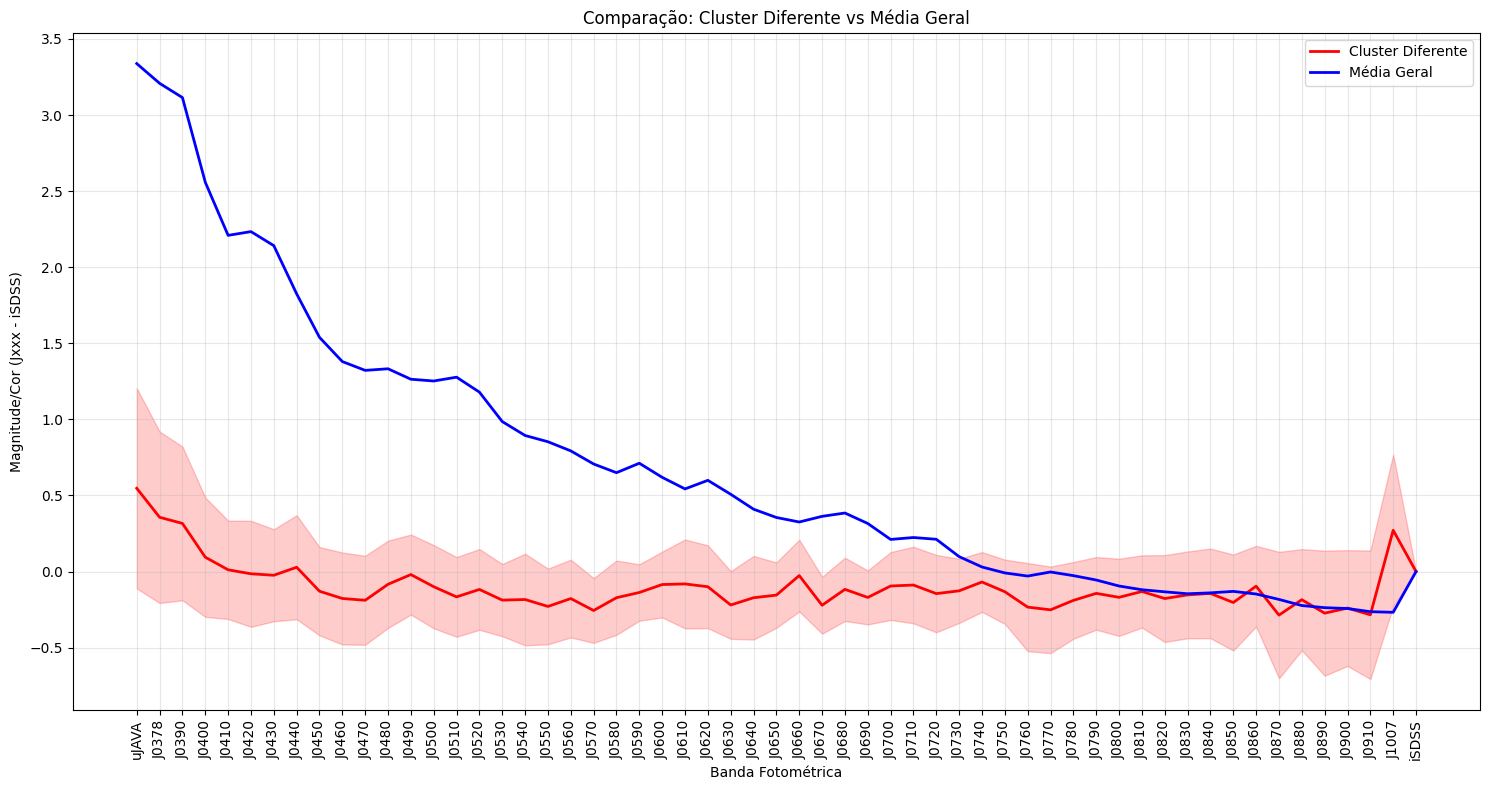

Bandas com maiores diferenças em relação à média geral:
1. J0378: -2.852 (diferença absoluta: 2.852)
2. J0390: -2.798 (diferença absoluta: 2.798)
3. uJAVA: -2.791 (diferença absoluta: 2.791)
4. J0400: -2.464 (diferença absoluta: 2.464)
5. J0420: -2.249 (diferença absoluta: 2.249)
6. J0410: -2.198 (diferença absoluta: 2.198)
7. J0430: -2.166 (diferença absoluta: 2.166)
8. J0440: -1.797 (diferença absoluta: 1.797)
9. J0450: -1.668 (diferença absoluta: 1.668)
10. J0460: -1.557 (diferença absoluta: 1.557)

Análise da variabilidade interna do cluster:
Variabilidade média interna: 0.289
Número de estrelas no cluster: 256
Distância média entre perfis: 3.028

Gerando hipóteses sobre a natureza do cluster...

=== HIPÓTESES SOBRE O CLUSTER DIFERENTE ===
Hipótese 1: Objetos com características espectrais específicas
Bandas com diferenças significativas:
  - uJAVA: -2.791
  - J0378: -2.852
  - J0390: -2.798
  - J0400: -2.464
  - J0410: -2.198
  - J0420: -2.249
  - J0430: -2.166
  - J0440: -1.797
 

In [45]:
# Executar análise de perfis
print("Executando análise detalhada dos perfis...")
media_diferente, diferencas = analisar_perfis_cluster_diferente(dados, df_resultado, filter_names)

# Sugerir hipóteses
print("\nGerando hipóteses sobre a natureza do cluster...")
picos_importantes = sugerir_hipoteses(media_diferente, diferencas, filter_names)

#### 11.4. Visualização Avançada dos Clusters

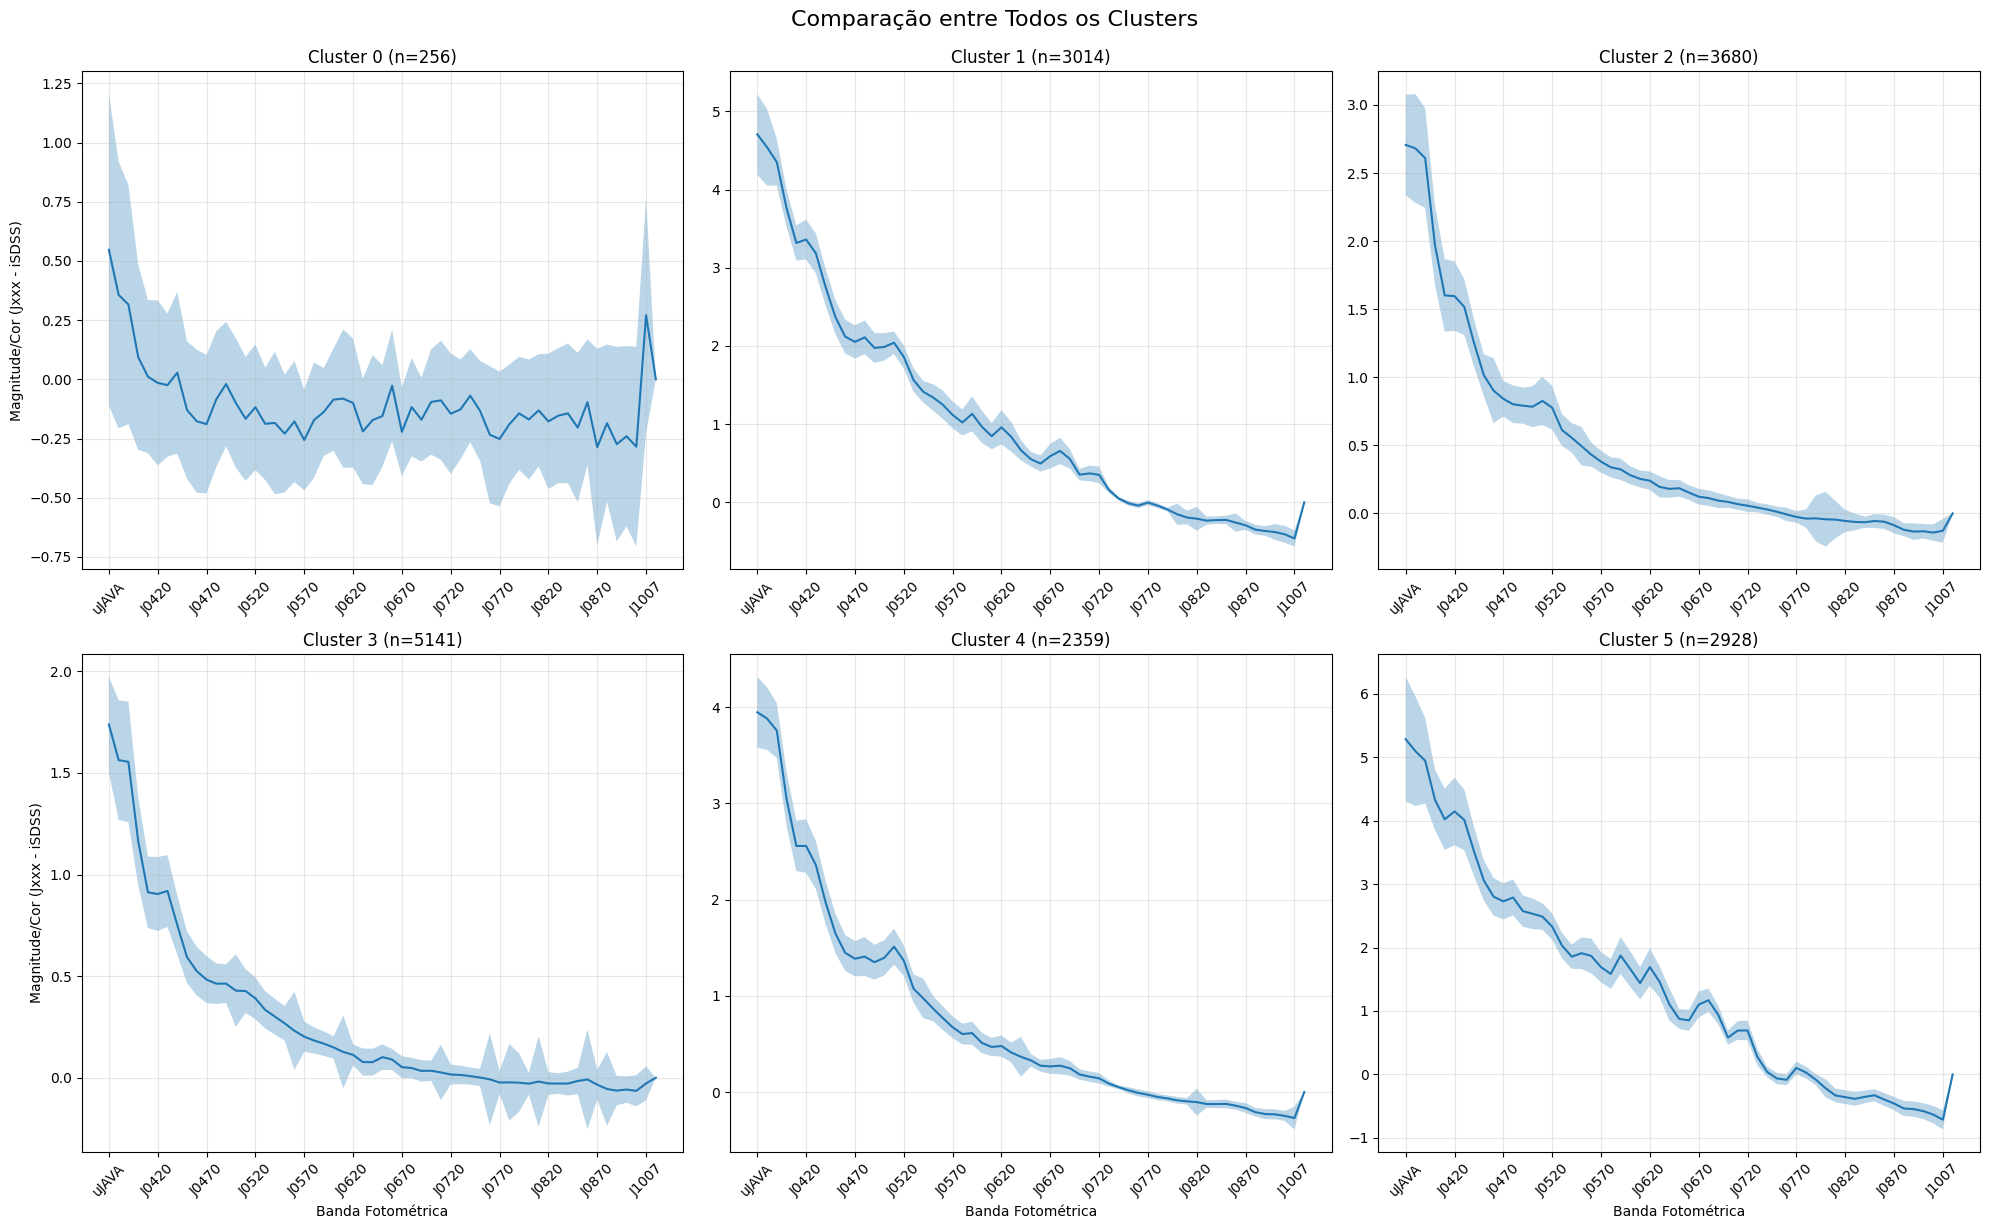

In [46]:
# Visualização comparativa entre clusters
def visualizar_comparacao_clusters(dados, df_resultado, filter_names, n_clusters=6):
    """
    Visualização comparativa detalhada entre todos os clusters
    """
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    for cluster in range(n_clusters):
        indices_cluster = df_resultado[df_resultado['Cluster'] == cluster].index
        dados_cluster = dados[indices_cluster]

        # Calcular média e desvio
        media = np.mean(dados_cluster, axis=0)
        desvio = np.std(dados_cluster, axis=0)

        # Plotar
        ax = axes[cluster]
        ax.plot(filter_names, media, label=f'Cluster {cluster}')
        ax.fill_between(filter_names, media - desvio, media + desvio, alpha=0.3)

        ax.set_title(f'Cluster {cluster} (n={len(indices_cluster)})')
        ax.set_xticks(range(0, len(filter_names), 5))
        ax.set_xticklabels([filter_names[i] for i in range(0, len(filter_names), 5)], rotation=45)
        ax.grid(True, alpha=0.3)

        if cluster >= 3:
            ax.set_xlabel('Banda Fotométrica')
        if cluster % 3 == 0:
            ax.set_ylabel('Magnitude/Cor (Jxxx - iSDSS)')

    plt.tight_layout()
    plt.suptitle('Comparação entre Todos os Clusters', y=1.02, fontsize=16)
    plt.show()

# Executar visualização comparativa
visualizar_comparacao_clusters(dados, df_resultado, filter_names)